In [65]:
# Importing the required libraries
import pandas as pd
pd.set_option('display.max_columns', 50) # Display up to 50 columns at a time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
plt.style.use('seaborn')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,5
import glob # To read all csv files in the directory
import seaborn as sns
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
import itertools
import time
import xgboost as xgb

In [66]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [67]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('data/Kickstarter*.csv')], ignore_index = True)


In [68]:
df.head(5)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type
0,0,Sharing the knowledge of the Transcendent Trut...,"{""id"":49,""name"":""Periodicals"",""analytics_name""...",0.0,US,the United States,1423788884,"{""id"":1203053572,""name"":""Arman Beisembayev (de...",USD,$,True,USD,1429027523,False,NaN,1.0,15000.0,665090018,NaN,False,NaN,1423847123,"{""id"":2444077,""name"":""Magalia"",""slug"":""magalia...",REVIVING TRANSCENDENT CONSCIOUSNESS (Canceled),NaN,"{""key"":""assets/012/035/511/53947927c01cba38688...",0.00,"{""id"":1702459,""project_id"":1702459,""state"":""in...",reviving-transcendent-consciousness,https://www.kickstarter.com/discover/categorie...,False,False,canceled,1427835176,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,0.00,international
1,0,Hayati is a High Fashion magazine geared towar...,"{""id"":49,""name"":""Periodicals"",""analytics_name""...",0.0,US,the United States,1417529406,"{""id"":2111265406,""name"":""Hayati Magazine (dele...",USD,$,True,USD,1420234911,False,NaN,1.0,5000.0,80617558,NaN,False,NaN,1417642911,"{""id"":2483553,""name"":""Rockville"",""slug"":""rockv...",Hayati Magazine (Canceled),NaN,"{""key"":""assets/011/962/316/6b7273da69aabea72ae...",0.00,"{""id"":1551225,""project_id"":1551225,""state"":""in...",hayati-magazine,https://www.kickstarter.com/discover/categorie...,False,False,canceled,1417818077,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,0.00,international
2,148,An optical illusion temporary tattoo. Point yo...,"{""id"":260,""name"":""Interactive Design"",""analyti...",1457.0,US,the United States,1457911892,"{""id"":2102688893,""name"":""Pablo Garcia"",""slug"":...",USD,$,True,USD,1459908000,False,NaN,1.0,100.0,888748006,NaN,False,NaN,1458253483,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",Memento Mori Tattoo,NaN,"{""key"":""assets/012/405/157/c6567f38e2cb48d1e5d...",1457.01,"{""id"":2421657,""project_id"":2421657,""state"":""ac...",memento-mori-tattoo,https://www.kickstarter.com/discover/categorie...,True,True,successful,1459908000,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,1457.01,international
3,57,A children's book in full color. It is writte...,"{""id"":22,""name"":""Illustration"",""analytics_name...",5627.0,US,the United States,1579779003,"{""id"":569631783,""name"":""Alan Hawley"",""is_regis...",USD,$,True,USD,1593605260,False,NaN,1.0,5000.0,1635691370,NaN,False,NaN,1591013260,"{""id"":2357024,""name"":""Atlanta"",""slug"":""atlanta...",The Hero,NaN,"{""key"":""assets/027/839/360/65b3ff84b14f364b290...",5627.00,"{""id"":3918464,""project_id"":3918464,""state"":""in...",the-hero,https://www.kickstarter.com/discover/categorie...,True,False,successful,1593605260,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,5627.00,international
4,51,Help Lauren Elens bring a New Orleans-Style Sn...,"{""id"":311,""name"":""Food Trucks"",""analytics_name...",5050.0,US,the United States,1494356186,"{""id"":1343144681,""name"":""Lauren Elens"",""is_reg...",USD,$,True,USD,1496952853,False,NaN,1.0,5000.0,887441191,NaN,False,NaN,1494360853,"{""id"":2480894,""name"":""Richmond"",""slug"":""richmo...",Sara Lou's New Orleans Style SnoBalls!,NaN,"{""key"":""assets/016/600/573/3e6c5567e469c8a5472...",5050.00,"{""id"":2993954,""project_id"":2993954,""state"":""ac...",sara-lous-new-orleans-style-sno-balls,https://www.kickstarter.com/discover/categorie...,True,False,successful,1496952855,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,5050.00,international


In [69]:
len(df)


498447

## Scrubbing the data

In this section the data will be cleaned and pre-processed in order to allow for exploratory data analysis and modeling.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498447 entries, 0 to 498446
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             498447 non-null  int64  
 1   blurb                     498428 non-null  object 
 2   category                  498447 non-null  object 
 3   converted_pledged_amount  498414 non-null  float64
 4   country                   498447 non-null  object 
 5   country_displayable_name  498447 non-null  object 
 6   created_at                498447 non-null  int64  
 7   creator                   498447 non-null  object 
 8   currency                  498447 non-null  object 
 9   currency_symbol           498447 non-null  object 
 10  currency_trailing_code    498447 non-null  bool   
 11  current_currency          498447 non-null  object 
 12  deadline                  498447 non-null  int64  
 13  disable_communication     498447 non-null  b

In [71]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_exchange_rate',
       'usd_pledged', 'usd_type'],
      dtype='object')

Description of each column:

- backers_count - number of people who contributed funds to the project
- blurb - short description of the project
- category - contains the category and sub-category of the project
- converted_pledged_amount - amount of money pledged, converted to the currency in the 'current_currency' column
- country - country the project creator is from
- created_at - date and time of when the project was initially created on Kickstarter
- creator - name of the project creator and other information about them, e.g. Kickstarter id number
- currency - original currency the project goal was denominated in
- currency_symbol - symbol of the original currency the project goal was denominated in
- currency_trailing_code - code of the original currency the project goal was denominated in
- current_currency - currency the project goal was converted to
- deadline - date and time of when the project will close for donations
-disable_communication - whether or not a project owner disabled communication with their backers
- friends - unclear (null or empty)
- fx_rate - foreign exchange rate between the original currency and the current_currency
- goal - funding goal
- id - id number of the project
- is_backing - unclear (null or false)
- is_starrable - whether or not a project can be starred (liked and saved) by users
- is_starred - whether or not a project has been starred (liked and saved) by users
- launched_at - date and time of when the project was launched for funding
- location - contains the town or city of the project creator
- name - name of the project
- permissions - unclear (null or empty)
- photo - contains a link and information to the project's photo/s
- pledged - amount pledged in the current_currency
- profile - details about the project's profile, including id number and various visual settings
- slug - name of the project with hyphens instead of spaces
- source_url - url for the project's category
- spotlight - after a project has been successful, it is spotlighted on the Kickstarter website
- staff_pick - whether a project was highlighted as a staff_pick when it was launched/live
- state - whether a project was successful, failed, canceled, suspending or still live
- state_changed_at - date and time of when a project's status was changed (same as the deadline for successful and failed projects)
- static_usd_rate - conversion rate between the original currency and USD
- urls - url to the project's page
- usd_pledged - amount pledged in USD
- usd_type - domestic or international

In [72]:
print(f"Of the {len(df)} projects in the dataset, there are {len(df[df.duplicated(subset='id')])} which are listed more than once.")


Of the 498447 projects in the dataset, there are 293479 which are listed more than once.


In [73]:
# Checking column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498447 entries, 0 to 498446
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             498447 non-null  int64  
 1   blurb                     498428 non-null  object 
 2   category                  498447 non-null  object 
 3   converted_pledged_amount  498414 non-null  float64
 4   country                   498447 non-null  object 
 5   country_displayable_name  498447 non-null  object 
 6   created_at                498447 non-null  int64  
 7   creator                   498447 non-null  object 
 8   currency                  498447 non-null  object 
 9   currency_symbol           498447 non-null  object 
 10  currency_trailing_code    498447 non-null  bool   
 11  current_currency          498447 non-null  object 
 12  deadline                  498447 non-null  int64  
 13  disable_communication     498447 non-null  b

In [74]:
# Dropping columns that are mostly null
df.drop(['friends', 'is_backing', 'is_starred', 'permissions'], axis=1, inplace=True)

Other columns are not useful for the purposes of this project, and can also be dropped for these reasons:

-converted_pledged_amount - most currencies are converted into USD in this column, but not all. Instead, the 'usd_pledged' column will be used as these all use the same currency (the dollar).
- creator - most projects are by different people, and so this cannot be usefully used to group or categorise projects, and is not useful in a machine learning context.
- currency - all currency values will be used as/converted to dollars, so that they can be evaluated together. It is not necessary to keep the original record because of this, and because it will be highly correlated with country (which will be kept).
- currency_symbol - as above.
- currency_trailing_code - as above.
- current_currency - as above.
- fx_rate - this is used to create 'converted_pledged_amount' from 'pledged', but does not always convert to dollars so can be dropped in favour of 'static_usd_rate' which always converts to dollars.
- photo - image processing/computer vision will not be used in this project.
- pledged - data in this column is stored in native currencies, so this will be dropped in favour of 'usd_pledged' which is all in the same currency (dollars).
- profile - this column contains a combination of information from other columns (e.g. id, state, dates, url).
- slug - this is simply the 'name' column with hyphens instead of spaces.
- source_url - the sites that the rows were each scraped from is not useful for building a model, as each is unique to an id.
- spotlight - projects can only be spotlighted after they are already successful, so this will be entirely correlated with successful projects.
- state_changed_at - this is the same as deadline for most projects. The only exceptions are for projects which were cancelled before their deadline, but they will not be included in this analysis.
- urls - as with source_url.
- usd_type - it is unclear what this column means, but it is unlikely to be necessary since all currency values will be converted to dollars, and other currency information has been dropped.

In [75]:
# Dropping columns that aren't useful
df.drop(['converted_pledged_amount', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'fx_rate', 'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight', 'state_changed_at', 'urls', 'usd_type'], axis=1, inplace=True)

Converting datetime columns

Columns containing dates are currently stored in unix time, and need to be converted to datetime. Because they have been converted from unix, all times are in UTC/GMT.

In [76]:
# Converting dates from unix to datetime
cols_to_convert = ['created_at', 'deadline', 'launched_at']
for c in cols_to_convert:
    df[c] = pd.to_datetime(df[c], origin='unix', unit='s')

In [77]:
print(f"The dataset contains projects added to Kickstarter between {min(df.created_at).strftime('%d %B %Y')} and {max(df.created_at).strftime('%d %B %Y')}.")


The dataset contains projects added to Kickstarter between 22 April 2009 and 09 October 2022.


Blurb

Natural language processing is beyond the scope of this project. The length of the blurbs written by project creators will be calculated though, in case this is useful for the model (e.g. people preferring to read shorter or longer blurbs when choosing what to fund). The original blurb variable will then be dropped.

In [78]:
# Count length of each blurb
df['blurb_length'] = df['blurb'].str.split().str.len()

# Drop blurb variable
df.drop('blurb', axis=1, inplace=True)

Category

The category variable is currently stored as a string, although it was clearly originally a dictionary. The example below shows that each project has both a category (e.g. games) and a sub-category (e.g. tabletop games). Both will be extracted.

In [79]:
# Example category value
df.iloc[0]['category']

'{"id":49,"name":"Periodicals","analytics_name":"Periodicals","slug":"publishing/periodicals","position":11,"parent_id":18,"parent_name":"Publishing","color":14867664,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/publishing/periodicals"}}}'

In [80]:
# Extracting the relevant sub-category section from the string
f = lambda x: x['category'].split('/')[1].split('","position')[0]
df['sub_category'] = df.apply(f, axis=1)

# Extracting the relevant category section from the string, and replacing the original category variable
f = lambda x: x['category'].split('"slug":"')[1].split('/')[0]
df['category'] = df.apply(f, axis=1)
f = lambda x: x['category'].split('","position"')[0] # Some categories do not have a sub-category, so do not have a '/' to split with
df['category'] = df.apply(f, axis=1)

In [81]:
# Counting the number of unique categories
print(f"There are {df.category.nunique()} unique categories and {df.sub_category.nunique()} unique sub-categories.")

There are 15 unique categories and 147 unique sub-categories.


Disable_communication

99.7% of project owners did not disable communication with their backers (unsurprisingly). Because nearly all projects have the same value for this variable, it will be dropped as it does not provide much information.

In [82]:
# Checking the proportions of each category
df.disable_communication.value_counts(normalize=True)

False    1.0
Name: disable_communication, dtype: float64

In [83]:
df.drop('disable_communication', axis=1, inplace=True)

Goal

The goal amount of funding for each project is currently recorded in native currencies. In order to allow for fair comparisons between projects, goals will be converted into dollars (as amount pledged already is).

In [84]:
# Calculate new column 'usd_goal' as goal * static_usd_rate
df['usd_goal'] = round(df['goal'] * df['static_usd_rate'],2)

In [85]:
# Dropping goal and static_usd_rate
df.drop(['goal', 'static_usd_rate'], axis=1, inplace=True)

In [86]:
df.drop(['usd_exchange_rate'], axis=1, inplace = True)

Is_starrable

Only 3.3% of projects were starrable by users. Although this is only a very small proportion, whether or not a project was liked and saved by users is likely to be informative about whether or not a project was successful, so the variable will be kept for now and assessed again once irrelevant rows have been dropped, to check it is still useful.

In [87]:
# Figure out what this is, and do a count_values() to figure out whether it's worth including or mostly FALSE
df.is_starrable.value_counts(normalize=True)

False    0.974372
True     0.025628
Name: is_starrable, dtype: float64

Location

The location field contains the town/city that a project originates from, as well as the country. There are a large number (15,235) of unique locations. Because the country is already recorded separately in the country field, and there are such a large number of unique categories (making one-hot encoding not useful, particularly as there are likely to be a lot of smaller towns and cities with very few projects), the column will be dropped.

In [88]:
# Example location value
df.iloc[0]['location']

'{"id":2444077,"name":"Magalia","slug":"magalia-ca","short_name":"Magalia, CA","displayable_name":"Magalia, CA","localized_name":"Magalia","country":"US","state":"CA","type":"Town","is_root":false,"expanded_country":"United States","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/magalia-ca","location":"https://www.kickstarter.com/locations/magalia-ca"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1653023089.a428b23e0d14db2b2a9f5afeb0ece295c753ac91&woe_id=2444077"}}}'

In [89]:
# Counting the number of unique locations
df.location.nunique()

42485

In [90]:
# Dropping location
df.drop('location', axis=1, inplace=True)

Name

The length of project names will be calculated, in case this is useful for the model. The original name variable will then be dropped.

In [91]:
# Count length of each name
df['name_length'] = df['name'].str.split().str.len()
# Drop name variable
df.drop('name', axis=1, inplace=True)

Usd_pledged

This column requires rounding to two decimal places.

In [92]:
df['usd_pledged'] = round(df['usd_pledged'],2)

Additional calculated features

Additional features can be calculated from the existing features, which may also help to predict whether a project is successfully funded. The features to be added are: time from creation to launch, campaign length, launch day of week, deadline day of week, launch month, deadline month, launch time of day, deadline time of day and mean pledge per backer. Original datetime values and the mean pledge per backer will be kept in for now for EDA purposes, but will be removed later, before modeling.

In [93]:
# Time between creating and launching a project
df['creation_to_launch_days'] = df['launched_at'] - df['created_at']
df['creation_to_launch_days'] = df['creation_to_launch_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only
# Or could show as number of hours:
# df['creation_to_launch_hours'] = df['launched_at'] - df['created_at']
# df['creation_to_launch_hours'] = df['creation_to_launch_hours'].dt.round('h') / np.timedelta64(1, 'h') 

# Campaign length
df['campaign_days'] = df['deadline'] - df['launched_at']
df['campaign_days'] = df['campaign_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only

# Launch day of week
df['launch_day'] = df['launched_at'].dt.day_name()

# Deadline day of week
df['deadline_day'] = df['deadline'].dt.day_name()

# Launch month
df['launch_month'] = df['launched_at'].dt.month_name()

# Deadline month
df['deadline_month'] = df['deadline'].dt.month_name()

In [94]:
# Launch time
df['launch_hour'] = df['launched_at'].dt.hour # Extracting hour from launched_at

def two_hour_launch(row):
    '''Creates two hour bins from the launch_hour column'''
    if row['launch_hour'] in (0,1):
        return '12am-2am'
    if row['launch_hour'] in (2,3):
        return '2am-4am'
    if row['launch_hour'] in (4,5):
        return '4am-6am'
    if row['launch_hour'] in (6,7):
        return '6am-8am'
    if row['launch_hour'] in (8,9):
        return '8am-10am'
    if row['launch_hour'] in (10,11):
        return '10am-12pm'
    if row['launch_hour'] in (12,13):
        return '12pm-2pm'
    if row['launch_hour'] in (14,15):
        return '2pm-4pm'
    if row['launch_hour'] in (16,17):
        return '4pm-6pm'
    if row['launch_hour'] in (18,19):
        return '6pm-8pm'
    if row['launch_hour'] in (20,21):
        return '8pm-10pm'
    if row['launch_hour'] in (22,23):
        return '10pm-12am'
    
df['launch_time'] = df.apply(two_hour_launch, axis=1) # Calculates bins from launch_time

df.drop('launch_hour', axis=1, inplace=True)

In [95]:
# Deadline time
df['deadline_hour'] = df['deadline'].dt.hour # Extracting hour from deadline

def two_hour_deadline(row):
    '''Creates two hour bins from the deadline_hour column'''
    if row['deadline_hour'] in (0,1):
        return '12am-2am'
    if row['deadline_hour'] in (2,3):
        return '2am-4am'
    if row['deadline_hour'] in (4,5):
        return '4am-6am'
    if row['deadline_hour'] in (6,7):
        return '6am-8am'
    if row['deadline_hour'] in (8,9):
        return '8am-10am'
    if row['deadline_hour'] in (10,11):
        return '10am-12pm'
    if row['deadline_hour'] in (12,13):
        return '12pm-2pm'
    if row['deadline_hour'] in (14,15):
        return '2pm-4pm'
    if row['deadline_hour'] in (16,17):
        return '4pm-6pm'
    if row['deadline_hour'] in (18,19):
        return '6pm-8pm'
    if row['deadline_hour'] in (20,21):
        return '8pm-10pm'
    if row['deadline_hour'] in (22,23):
        return '10pm-12am'
    
df['deadline_time'] = df.apply(two_hour_deadline, axis=1) # Calculates bins from launch_time

df.drop('deadline_hour', axis=1, inplace=True)

In [96]:
# Mean pledge per backer
df['pledge_per_backer'] = round(df['usd_pledged']/df['backers_count'],2)

Checking for null values

In [97]:
df.isna().sum()

backers_count                   0
category                        0
country                         0
country_displayable_name        0
created_at                      0
deadline                        0
id                              0
is_starrable                    0
launched_at                     0
staff_pick                      0
state                           0
usd_pledged                    33
blurb_length                   19
sub_category                    0
usd_goal                        0
name_length                     0
creation_to_launch_days         0
campaign_days                   0
launch_day                      0
deadline_day                    0
launch_month                    0
deadline_month                  0
launch_time                     0
deadline_time                   0
pledge_per_backer           31591
dtype: int64

In [98]:
# Replacing null values for blurb_length with 0
df.blurb_length.fillna(0, inplace=True)

In [99]:
df.usd_pledged.fillna(0,inplace=True)

In [100]:
# Confirming there are no null values remaining
df.isna().sum().sum()

31591

Dropping rows

This project aims to predict whether projects succeed or fail. The dataset also includes canceled, live (i.e. not yet finished) and suspended projects. These will now be removed.

In [101]:
# Number of projects of different states
df.state.value_counts()

successful    299525
failed        166432
canceled       19569
live           12888
submitted         30
started            3
Name: state, dtype: int64

In [102]:
# Dropping projects which are not successes or failures
df = df[df['state'].isin(['successful', 'failed'])]

In [103]:
# Confirming that the most recent deadline is the day on which the data was scraped, i.e. there are no projects which have yet to be resolved into either successes or failures
max(df.deadline)

Timestamp('2022-10-11 19:15:06')

In [104]:
#Number of projects of different states
df.state.value_counts()

successful    299525
failed        166432
Name: state, dtype: int64

Dropping duplicates

As demonstrated above, some projects are included in the dataset more than once. Duplicates will now be assessed and removed.

In [105]:
# Checking for duplicates of individual projects, and sorting by id
duplicates = df[df.duplicated(subset='id')]
print(f"Of the {len(df)} projects in the dataset, there are {len(df[df.duplicated(subset='id')])} which are listed more than once.")
print(f"Of these, {len(df[df.duplicated()])} have every value in common between duplicates.")

Of the 465957 projects in the dataset, there are 274424 which are listed more than once.
Of these, 274384 have every value in common between duplicates.


In [106]:
# Dropping duplicates which have every value in common
df.drop_duplicates(inplace=True)

In [107]:
len(df)

191573

In [108]:
print(len(df[df.duplicated(subset='id')]), "duplicated projects remain.")
duplicated = df[df.duplicated(subset='id', keep=False)].sort_values(by='id')
duplicated

40 duplicated projects remain.


,backers_count,category,country,country_displayable_name,created_at,deadline,id,is_starrable,launched_at,staff_pick,state,usd_pledged,blurb_length,sub_category,usd_goal,name_length,creation_to_launch_days,campaign_days,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time,pledge_per_backer
120530,5,technology,CA,Canada,2016-05-27 03:14:36,2016-07-23 03:29:20,198918894,False,2016-06-23 03:29:20,False,failed,531.19,27.0,diy electronics,20310.06,4,27,30,Thursday,Saturday,June,July,2am-4am,2am-4am,106.24
181962,5,technology,CA,Canada,2016-05-27 03:14:36,2016-07-23 03:29:20,198918894,False,2016-06-23 03:29:20,False,failed,531.30,27.0,diy electronics,20314.58,4,27,30,Thursday,Saturday,June,July,2am-4am,2am-4am,106.26
328011,126,fashion,CA,Canada,2021-05-18 17:45:01,2022-06-05 01:00:04,236227570,False,2022-05-21 01:00:04,False,successful,4427.49,15.0,accessories,389.66,7,367,15,Saturday,Sunday,May,June,12am-2am,12am-2am,35.14
197154,126,fashion,CA,Canada,2021-05-18 17:45:01,2022-06-05 01:00:04,236227570,False,2022-05-21 01:00:04,False,successful,4430.38,15.0,accessories,389.91,7,367,15,Saturday,Sunday,May,June,12am-2am,12am-2am,35.16
259933,135,comics,AU,Australia,2020-08-17 11:41:09,2020-11-16 02:00:01,321114315,False,2020-11-01 01:00:01,False,successful,4396.15,11.0,comic books,1762.60,3,76,15,Sunday,Monday,November,November,12am-2am,2am-4am,32.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21822,657,design,JP,Japan,2021-08-19 01:13:35,2021-11-25 01:42:48,2047937878,False,2021-09-26 00:42:48,False,successful,51218.82,17.0,product design,9056.06,10,38,60,Sunday,Thursday,September,November,12am-2am,12am-2am,77.96
256079,57,publishing,CA,Canada,2015-04-06 04:57:47,2015-05-09 05:00:00,2093974950,False,2015-04-08 03:57:00,False,successful,8550.65,17.0,nonfiction,6811.67,1,2,31,Wednesday,Saturday,April,May,2am-4am,4am-6am,150.01
477336,57,publishing,CA,Canada,2015-04-06 04:57:47,2015-05-09 05:00:00,2093974950,False,2015-04-08 03:57:00,False,successful,8557.15,17.0,nonfiction,6816.85,1,2,31,Wednesday,Saturday,April,May,2am-4am,4am-6am,150.13
400246,569,games,US,the United States,2022-04-12 15:14:50,2022-05-19 03:59:00,2132406494,False,2022-04-30 14:26:34,False,successful,16319.00,9.0,tabletop games,8000.00,7,18,19,Saturday,Thursday,April,May,2pm-4pm,2am-4am,28.68


In [109]:
# Get list of index numbers for duplicated ids
dup_ids = duplicated.id.unique()
for i in dup_ids:
    index1 = duplicated[duplicated.id == i][:1].index.values
    index2 = duplicated[duplicated.id == i][1:2].index.values
    print(index1, index2)
    #print(duplicated.loc[index1] == duplicated.loc[index2]) # produces TypeError: Could not compare [None] with block values

[120530] [181962]
[328011] [197154]
[259933] [132820]
[150221] [54249]
[136020] [85713]
[152677] [275252]
[265319] [175618]
[133696] [21616]
[69824] [115833]
[111761] [496751]
[434137] [275877]
[175853] [252621]
[114447] [52469]
[371275] [126721]
[192158] [351197]
[92003] [32226]
[252167] [360024]
[59956] [125022]
[94361] [482792]
[253049] [109617]
[21266] [36126]
[186640] [159199]
[182567] [68072]
[95861] [91516]
[405566] [261838]
[13438] [11946]
[101780] [193524]
[393917] [223085]
[422588] [213855]
[312612] [62144]
[388610] [1011]
[399309] [96073]
[454501] [377696]
[3575] [150193]
[451872] [119435]
[85542] [181742]
[151195] [166449]
[4164] [21822]
[256079] [477336]
[400246] [322393]


In [110]:
df.loc[120530] == df.loc[181962]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch_days      True
campaign_days                True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
pledge_per_backer           False
dtype: bool

In [111]:
df.loc[74874] == df.loc[295271]

backers_count               False
category                     True
country                      True
country_displayable_name     True
created_at                  False
deadline                    False
id                          False
is_starrable                 True
launched_at                 False
staff_pick                   True
state                       False
usd_pledged                 False
blurb_length                 True
sub_category                False
usd_goal                    False
name_length                 False
creation_to_launch_days     False
campaign_days               False
launch_day                  False
deadline_day                False
launch_month                False
deadline_month              False
launch_time                 False
deadline_time               False
pledge_per_backer           False
dtype: bool

In [112]:
df.loc[192158] == df.loc[351197]

backers_count                True
category                     True
country                      True
country_displayable_name     True
created_at                   True
deadline                     True
id                           True
is_starrable                 True
launched_at                  True
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                 True
sub_category                 True
usd_goal                    False
name_length                  True
creation_to_launch_days      True
campaign_days                True
launch_day                   True
deadline_day                 True
launch_month                 True
deadline_month               True
launch_time                  True
deadline_time                True
pledge_per_backer           False
dtype: bool

The results above show that for each pair of duplicates, there are differences in the usd_pledge and usd_goal columns. The differences are only in the order of a few cents or dollars, so it does not make much difference which one is kept. Therefore the first one of each pair will be dropped.

In [113]:
df.drop_duplicates(subset='id', keep='first', inplace=True)

Setting the index

The id will now be set as the index.

In [114]:
# Setting the id column as the index
df.set_index('id', inplace=True)
df.head()

,backers_count,category,country,country_displayable_name,created_at,deadline,is_starrable,launched_at,staff_pick,state,usd_pledged,blurb_length,sub_category,usd_goal,name_length,creation_to_launch_days,campaign_days,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time,pledge_per_backer
id,,,,,,,,,,,,,,,,,,,,,,,,
888748006,148,design,US,the United States,2016-03-13 23:31:32,2016-04-06 02:00:00,False,2016-03-17 22:24:43,True,successful,1457.01,16.0,interactive design,100.0,3,4,19,Thursday,Wednesday,March,April,10pm-12am,2am-4am,9.84
1635691370,57,art,US,the United States,2020-01-23 11:30:03,2020-07-01 12:07:40,False,2020-06-01 12:07:40,False,successful,5627.00,13.0,illustration,5000.0,2,130,30,Monday,Wednesday,June,July,12pm-2pm,12pm-2pm,98.72
887441191,51,food,US,the United States,2017-05-09 18:56:26,2017-06-08 20:14:13,False,2017-05-09 20:14:13,False,successful,5050.00,14.0,food trucks,5000.0,6,0,30,Tuesday,Thursday,May,June,8pm-10pm,8pm-10pm,99.02
1015963105,44,food,US,the United States,2016-08-22 16:30:07,2017-04-22 18:36:25,False,2017-03-23 18:36:25,False,successful,5580.00,26.0,food trucks,5000.0,2,213,30,Thursday,Saturday,March,April,6pm-8pm,6pm-8pm,126.82
1328231502,19,music,US,the United States,2019-08-01 17:06:23,2019-08-08 20:15:23,False,2019-08-01 20:15:23,False,successful,610.00,24.0,rock,500.0,8,0,7,Thursday,Thursday,August,August,8pm-10pm,8pm-10pm,32.11


## Exploring the data

In this section, exploratory data analysis will be conducted, in order to explore the data and draw useful insights.

#### Key statistics

In [115]:
# Summary statistics for the numerical features
df.describe()

,backers_count,usd_pledged,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,pledge_per_backer
count,191533.000000,1.915330e+05,191533.000000,1.915330e+05,191533.000000,191533.000000,191533.000000,179428.000000
mean,149.299473,1.456584e+04,17.812659,3.613473e+04,5.668934,50.124140,33.102901,82.075960
std,951.424554,1.436353e+05,5.626581,9.761559e+05,2.679809,142.638911,12.323057,159.068716
min,0.000000,0.000000e+00,0.000000,1.000000e-02,1.000000,0.000000,1.000000,0.460000
25%,4.000000,1.404900e+02,14.000000,1.500000e+03,4.000000,3.000000,30.000000,27.447500
50%,29.000000,1.770850e+03,19.000000,4.854500e+03,5.000000,13.000000,30.000000,51.130000
75%,96.000000,7.253600e+03,22.000000,1.200000e+04,8.000000,39.000000,35.000000,90.910000
max,185341.000000,4.175415e+07,43.000000,1.182690e+08,27.000000,3569.000000,121.000000,10000.000000


In [116]:
print("Key stats:")
print("\nThe total amount of money that projects have aimed to raise is ${0:,.0f}".format(df.usd_goal.sum()))
print("The total amount of money pledged by backers is ${0:,.0f}".format(df.usd_pledged.sum()))
print("The total amount of money pledged by backers to successful projects is ${0:,.0f}".format(sum(df.loc[df['state'] == 'successful'].usd_pledged)))

print("\nThe total number of successful or failed projects launched on Kickstarter is: {0:,}".format(len(df)))
print("The total number of projects which were successfully funded is: {0:,}".format(len(df.loc[df['state'] == 'successful'])))
print(f"The proportion of completed projects which were successfully funded is: {int(round((len(df.loc[df['state'] == 'successful'])/len(df))*100,0))}%")

print("\nThe mean project fundraising goal is ${0:,.0f}".format(df.usd_goal.mean()))
print("The mean amount pledged per project is ${0:,.0f}".format(df.usd_pledged.mean()))
print("The mean amount pledged per successful project is ${0:,.0f}".format(df.loc[df['state'] == 'successful'].usd_pledged.mean()))
print("The mean amount pledged per failed project is ${0:,.0f}".format(df.loc[df['state'] == 'failed'].usd_pledged.mean()))
      
print("\nThe mean number of backers per project is", int(round(df.backers_count.mean(),0)))
print("The mean pledge per backer is ${0:,.0f}".format(df.pledge_per_backer.mean()))
print("The mean number of days a campaign is run for is", int(round(df.campaign_days.mean(),0)))

Key stats:

The total amount of money that projects have aimed to raise is $6,920,993,429
The total amount of money pledged by backers is $2,789,838,863
The total amount of money pledged by backers to successful projects is $2,706,558,979

The total number of successful or failed projects launched on Kickstarter is: 191,533
The total number of projects which were successfully funded is: 114,371
The proportion of completed projects which were successfully funded is: 60%

The mean project fundraising goal is $36,135
The mean amount pledged per project is $14,566
The mean amount pledged per successful project is $23,665
The mean amount pledged per failed project is $1,079

The mean number of backers per project is 149
The mean pledge per backer is $82
The mean number of days a campaign is run for is 33


How do succesful and failed projects differ?

The graphs below show how various features differ between failed and successful projects.

Unsurprisingly, successful projects tend to have smaller (and therefore more realistic) goals - the median amount sought by successful projects is about half that of failed projects.
The differences in the median amount pledged per project are more surprising. The median amount pledged per successful project is considerably higher than the median amount requested, suggesting that projects that meet their goal tend to go on to gain even more funding, and become 'over-funded'.
On a related note, the difference between failed and successful companies is much larger in terms of amount pledged and the number of backers, compared to goal amount. Probably once potential backers see that a project looks like it will be successful, they are much more likely to jump on the bandwagon and fund it.
Successful projects have slightly shorter durations.
Successful projects tend to take slightly longer to launch, measured from the time the project was first created on the site.
Average name and blurb lengths are very similar between failed and successful projects.
Roughly 20% of successful projects were highlighted on the site as staff picks. It does not seem unreasonable to suggest a causative relationship here, i.e. that projects that are chosen as staff picks are much more likely to go on to be successful, and that only a few staff picks go on to fail. This measurement is possibly polluted by the point at which a project is chosen as a staff pick, however - e.g. a project may already have some backers and funding when it is chosen as a staff pick.

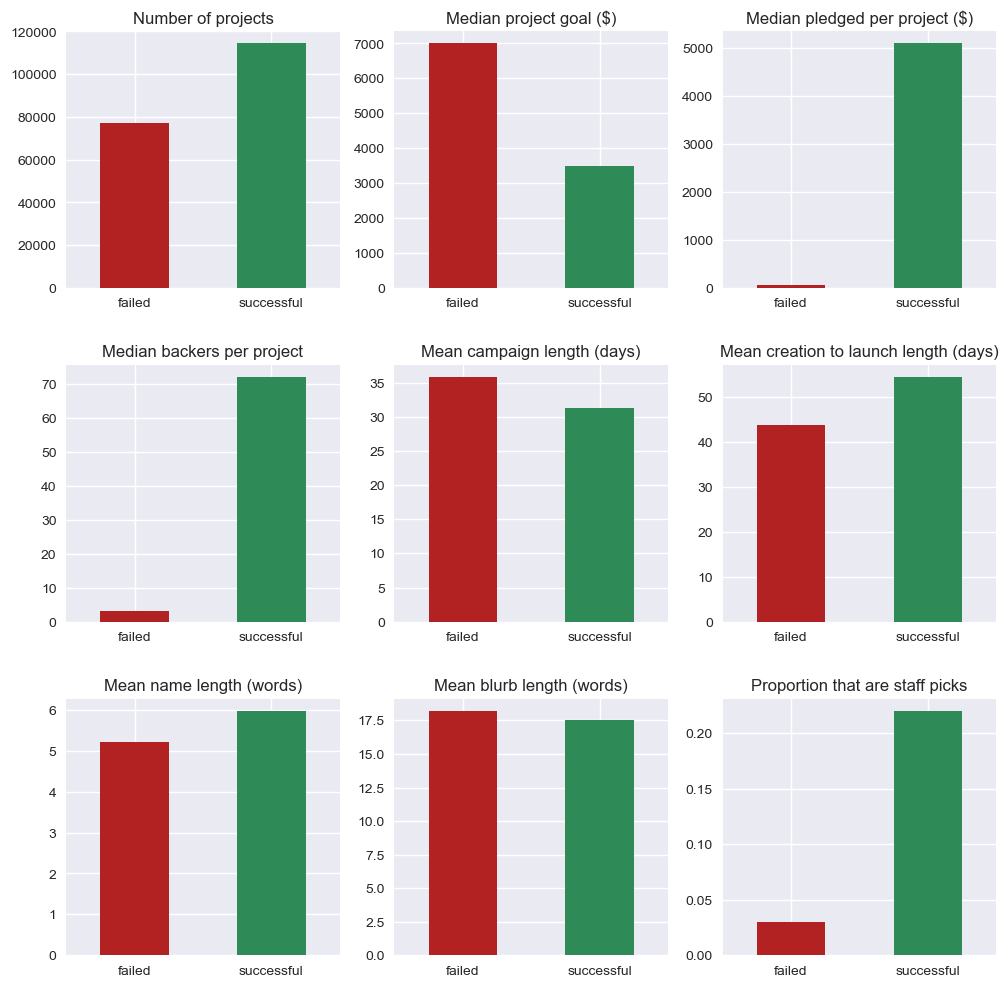

In [117]:
# Plotting the average amount pledged to successful and unsuccesful projects
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12,12))

df['state'].value_counts(ascending=True).plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'], rot=0)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('state').usd_goal.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'], rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('state').usd_pledged.median().plot(kind='bar', ax=ax3, color=['firebrick', 'seagreen'], rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

df.groupby('state').backers_count.median().plot(kind='bar', ax=ax4, color=['firebrick', 'seagreen'], rot=0)
ax4.set_title('Median backers per project')
ax4.set_xlabel('')

df.groupby('state').campaign_days.mean().plot(kind='bar', ax=ax5, color=['firebrick', 'seagreen'], rot=0)
ax5.set_title('Mean campaign length (days)')
ax5.set_xlabel('')

df.groupby('state').creation_to_launch_days.mean().plot(kind='bar', ax=ax6, color=['firebrick', 'seagreen'], rot=0)
ax6.set_title('Mean creation to launch length (days)')
ax6.set_xlabel('')

df.groupby('state').name_length.mean().plot(kind='bar', ax=ax7, color=['firebrick', 'seagreen'], rot=0)
ax7.set_title('Mean name length (words)')
ax7.set_xlabel('')

df.groupby('state').blurb_length.mean().plot(kind='bar', ax=ax8, color=['firebrick', 'seagreen'], rot=0)
ax8.set_title('Mean blurb length (words)')
ax8.set_xlabel('')

# Creating a dataframe grouped by staff_pick with columns for failed and successful
pick_df = pd.get_dummies(df.set_index('staff_pick').state).groupby('staff_pick').sum()
# Normalizes counts by column, and selects the 'True' category (iloc[1])
(pick_df.div(pick_df.sum(axis=0), axis=1)).iloc[1].plot(kind='bar', ax=ax9, color=['firebrick', 'seagreen'], rot=0) 
ax9.set_title('Proportion that are staff picks')
ax9.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

How has fundraising changed over time?

The graph below shows the number of projects launched each month on Kickstarter from 2009 to 2019.

The number of projects steadily grows from when the company was founded in 2009 up to the start of 2014.
From 2012 Kickstarter started expanding into other countries, having launched initially in the US.
Growth increased dramatically in 2014, and has remained at a high level since then, with a small decrease from 2015 to 2016.
Seasonality is also hinted at, with fewer projects appearing to be launched in November.
The second graph shows a similar story, with the cumulative amount pledged increasing more quickly from 2012 onwards.

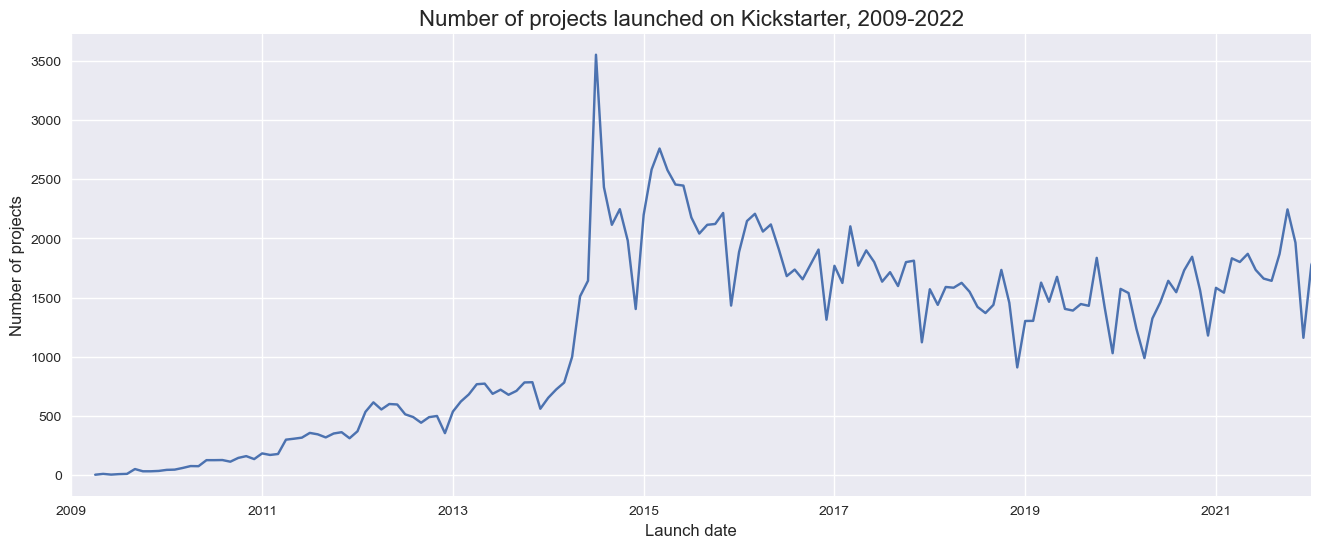

In [118]:
# Plotting the number of projects launched each month
plt.figure(figsize=(16,6))
df.set_index('launched_at').category.resample('MS').count().plot()
plt.xlim('2009-01-01', '2022-01-01') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
plt.title('Number of projects launched on Kickstarter, 2009-2022', fontsize=16)
plt.show()

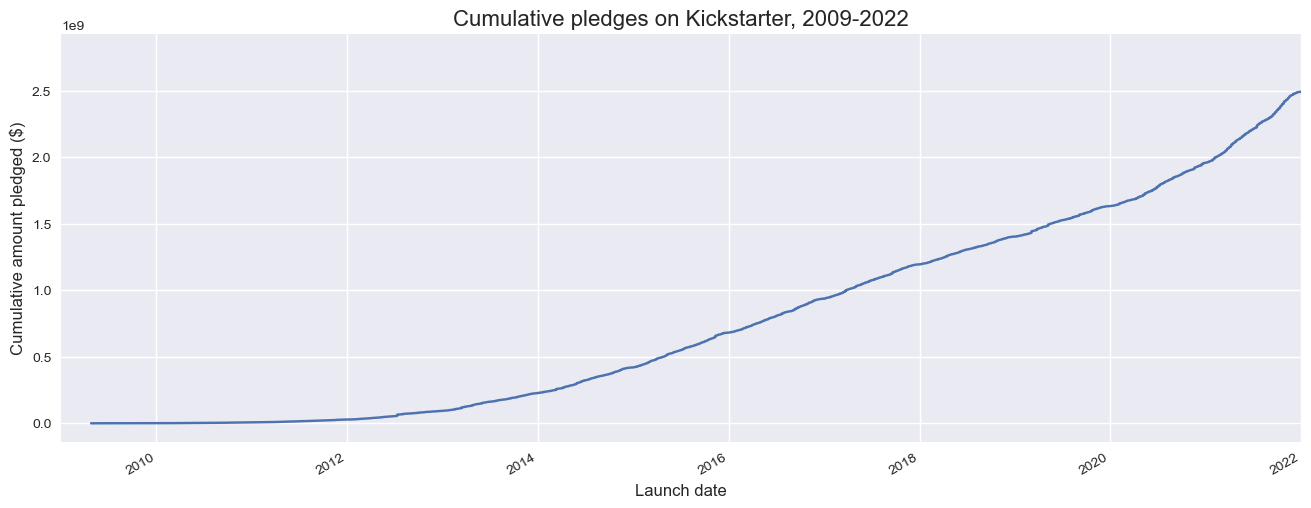

In [119]:
# Plotting the cumulative amount pledged on Kickstarter
plt.figure(figsize=(16,6))
df.set_index('launched_at').sort_index().usd_pledged.cumsum().plot()
plt.xlim('2009-01-01', '2022-01-01') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Cumulative amount pledged ($)', fontsize=12)
plt.title('Cumulative pledges on Kickstarter, 2009-2022', fontsize=16)
plt.show()

The table and graph below show the total and distribution of pledged amounts for each year 2009-2019. Again, the trend can be split into two phases, with a change in 2014. From 2014 onwards there was greater variation in the amounts pledged, with lower median amounts than the period 2009-2014, but generally higher mean amounts (with the exception of 2013) due to some very large projects.

In [120]:
print("Average amount pledged per project in each year, in $:")
print(round(df.set_index('launched_at').usd_pledged.resample('YS').mean(),2))

Average amount pledged per project in each year, in $:
launched_at
2009-01-01     4003.30
2010-01-01     4989.04
2011-01-01     6057.83
2012-01-01    10684.78
2013-01-01    16236.49
2014-01-01     9616.78
2015-01-01     9636.17
2016-01-01    11439.58
2017-01-01    12476.29
2018-01-01    11812.80
2019-01-01    13254.10
2020-01-01    18472.81
2021-01-01    25604.93
2022-01-01    34641.65
Freq: AS-JAN, Name: usd_pledged, dtype: float64


c:\Users\Abdel Abdalla\miniconda3\envs\minimal_ds\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Abdel Abdalla\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


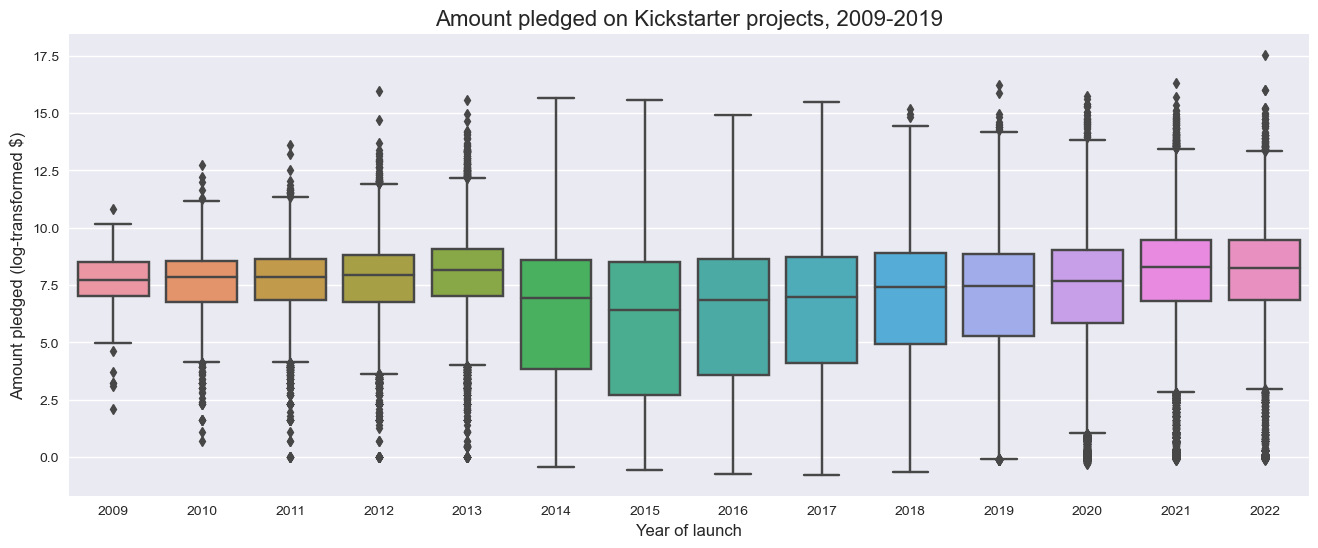

In [121]:
# Plotting the distribution of pledged amounts each year
plt.figure(figsize=(16,6))
sns.boxplot(df.launched_at.dt.year, np.log(df.usd_pledged))
plt.xlabel('Year of launch', fontsize=12)
plt.ylabel('Amount pledged (log-transformed $)', fontsize=12) # Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Amount pledged on Kickstarter projects, 2009-2019', fontsize=16)
plt.show()

The table and graph below are similar to the ones above, but for the goals of each project. The changes in goals show a similar pattern to the changes in the amounts pledged

In [122]:
print("Average fundraising goal per project in each year, in $:")
print(round(df.set_index('launched_at').usd_goal.resample('YS').mean(),2))

Average fundraising goal per project in each year, in $:
launched_at
2009-01-01     3874.60
2010-01-01     4789.72
2011-01-01     5903.88
2012-01-01     8749.74
2013-01-01    12212.24
2014-01-01    34950.12
2015-01-01    66120.62
2016-01-01    52618.19
2017-01-01    56431.69
2018-01-01    23620.36
2019-01-01    22370.90
2020-01-01    30258.19
2021-01-01    17864.97
2022-01-01    22557.27
Freq: AS-JAN, Name: usd_goal, dtype: float64


c:\Users\Abdel Abdalla\miniconda3\envs\minimal_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


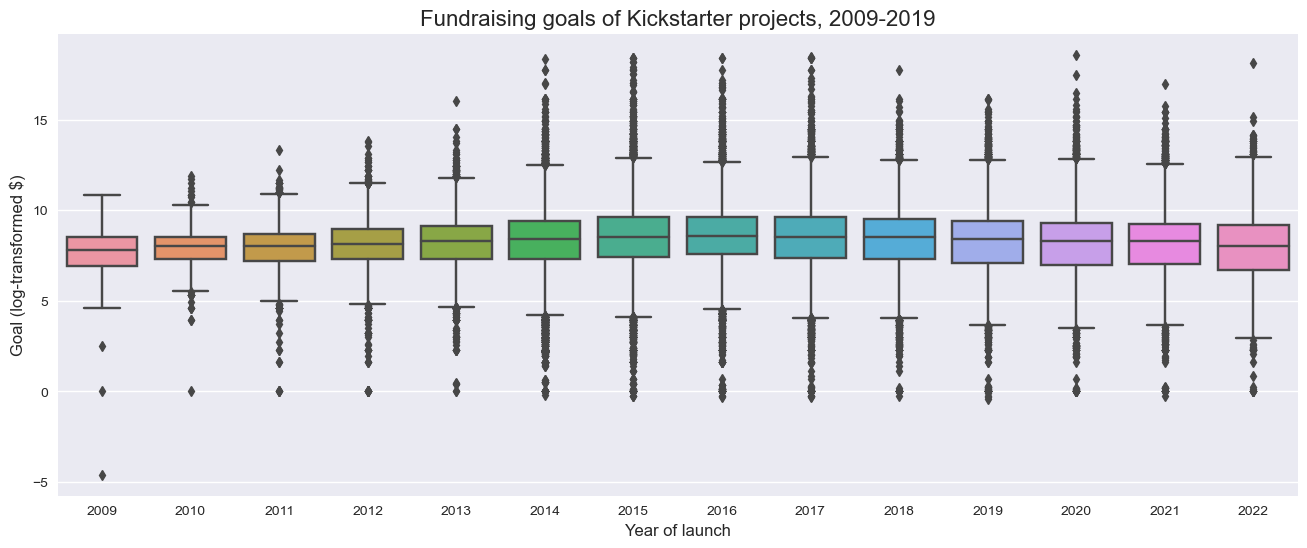

In [123]:
# Plotting the distribution of goal amounts each year
plt.figure(figsize=(16,6))
sns.boxplot(df.launched_at.dt.year, np.log(df.usd_goal))
plt.xlabel('Year of launch', fontsize=12)
plt.ylabel('Goal (log-transformed $)', fontsize=12) # Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Fundraising goals of Kickstarter projects, 2009-2019', fontsize=16)
plt.show()

The graph below shows the number and proportion of failed and successful projects each year. Once again, there is a change from 2014. From 2009 to 2013, each year about 80% of projects were successful. However, this decreased from 2014, although since then it has mostly been rising again.

What types of projects do people launch and which are more successful?

There are 15 project categories, of which music is the most common, followed by film & video and art.
Technology projects have the highest goals by far (in terms of their median goal size), followed by food (e.g. funding for restaurants), with other categories generally much smaller in terms of their funding goals.
However, technology projects are towards the bottom of the leaderboard in terms of the median amount actually pledged.
Games, comics, dance and design projects obtain the greatest amount of funding, on average (median).
The most frequently succesful categories are comics and dance (probably at least partly due to their relatively small funding goals), while the least successful are food, journalism and technology (again, probably because of their large funding goals).
Comics and games tend to attract the most backers, but each backer tends to pledge less.
Dance and film & video tend to attract the most generous backers.

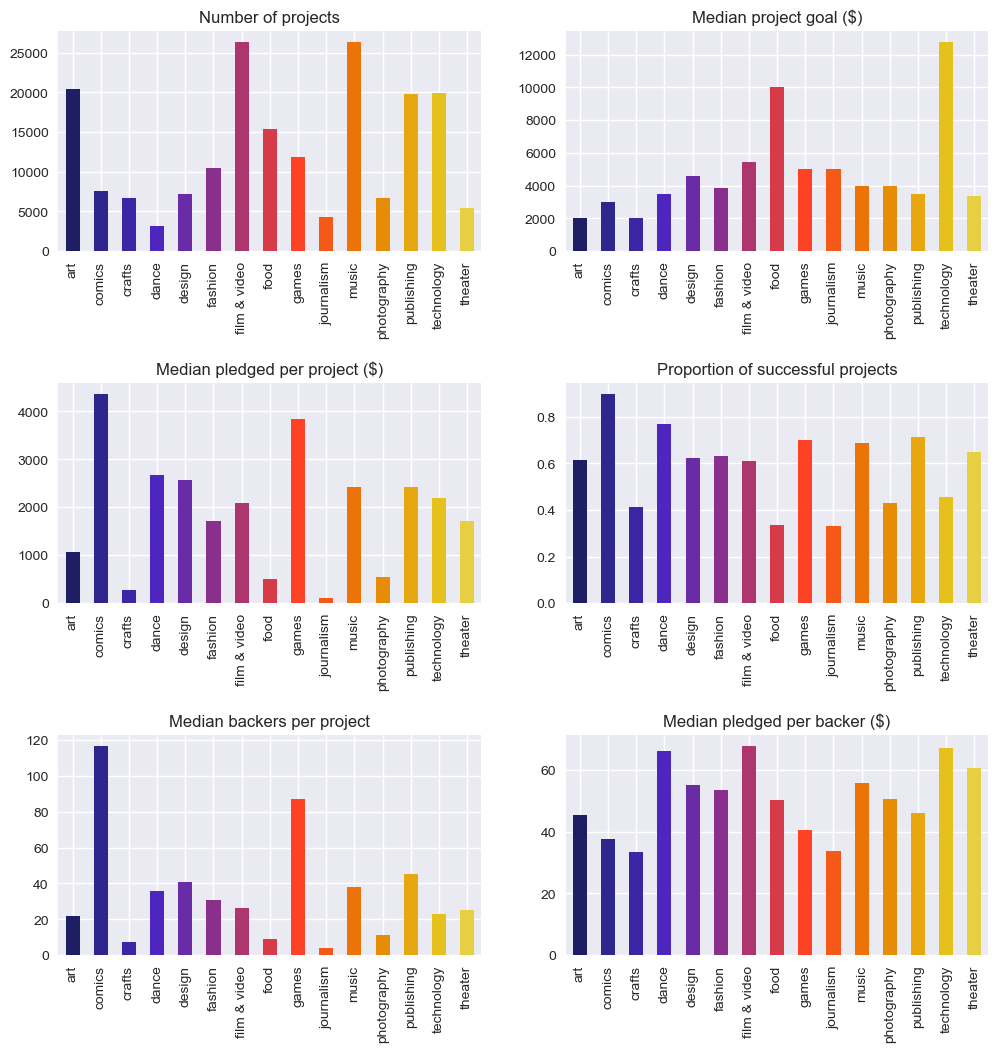

In [124]:
# Creating a dataframe grouped by category with columns for failed and successful
cat_df = pd.get_dummies(df.set_index('category').state).groupby('category').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.category.nunique())) # Setting a colormap

df.groupby('category').category.count().plot(kind='bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('category').usd_goal.median().plot(kind='bar', ax=ax2, color=color)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('category').usd_pledged.median().plot(kind='bar', ax=ax3, color=color)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

cat_df.div(cat_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color=color) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

df.groupby('category').backers_count.median().plot(kind='bar', ax=ax5, color=color)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

df.groupby('category').pledge_per_backer.median().plot(kind='bar', ax=ax6, color=color)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.6)
plt.show()

Where do project owners come from and are some countries more successful than others?

The vast majority of projects are from the US, with more than six times the total number of projects compared to the second most prolific country (the UK).
Switzerland has the highest median project goal size, although the differences in mean goal sizes are less extreme.
Projects from Hong Kong are the most successful, have the most backers, receive more per backer, and attract considerably more money than projects from elsewhere - nearly twice the next most lucrative country (Japan).

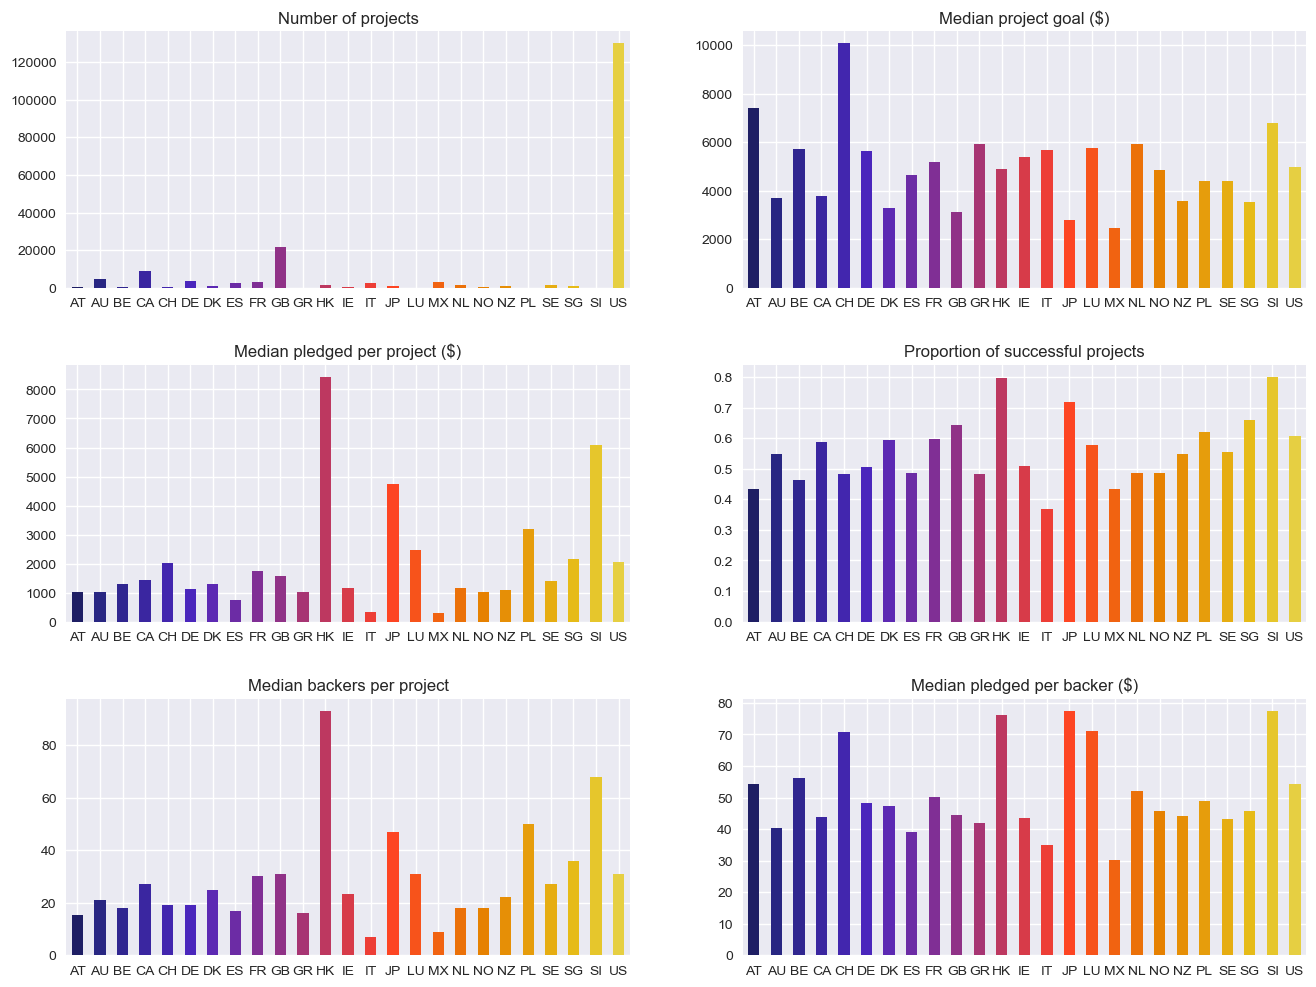

In [125]:
# Creating a dataframe grouped by country with columns for failed and successful
country_df = pd.get_dummies(df.set_index('country').state).groupby('country').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.country.nunique()))

df.groupby('country').country.count().plot(kind='bar', ax=ax1, color=color, rot=0)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('country').usd_goal.median().plot(kind='bar', ax=ax2, color=color, rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('country').usd_pledged.median().plot(kind='bar', ax=ax3, color=color, rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

country_df.div(country_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color=color, rot=0) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

df.groupby('country').backers_count.median().plot(kind='bar', ax=ax5, color=color, rot=0)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

df.groupby('country').pledge_per_backer.median().plot(kind='bar', ax=ax6, color=color, rot=0)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

When is the best time to launch a project?

Tuesday appears to be the best day to launch a project. It is the most popular launch day, and has the highest proportion of successful projects, the most backers, the highest median amount pledged per backer, and the highest median pledge amount overall.
Weekends (and to a lesser extent Fridays) are the least popular days to launch a project, attract less money, have fewer backers, receive smaller pledges per backer, and are slightly less successful. They also tend to have lower goals, making it more surprising that they tend to be less successful and receive less funding.

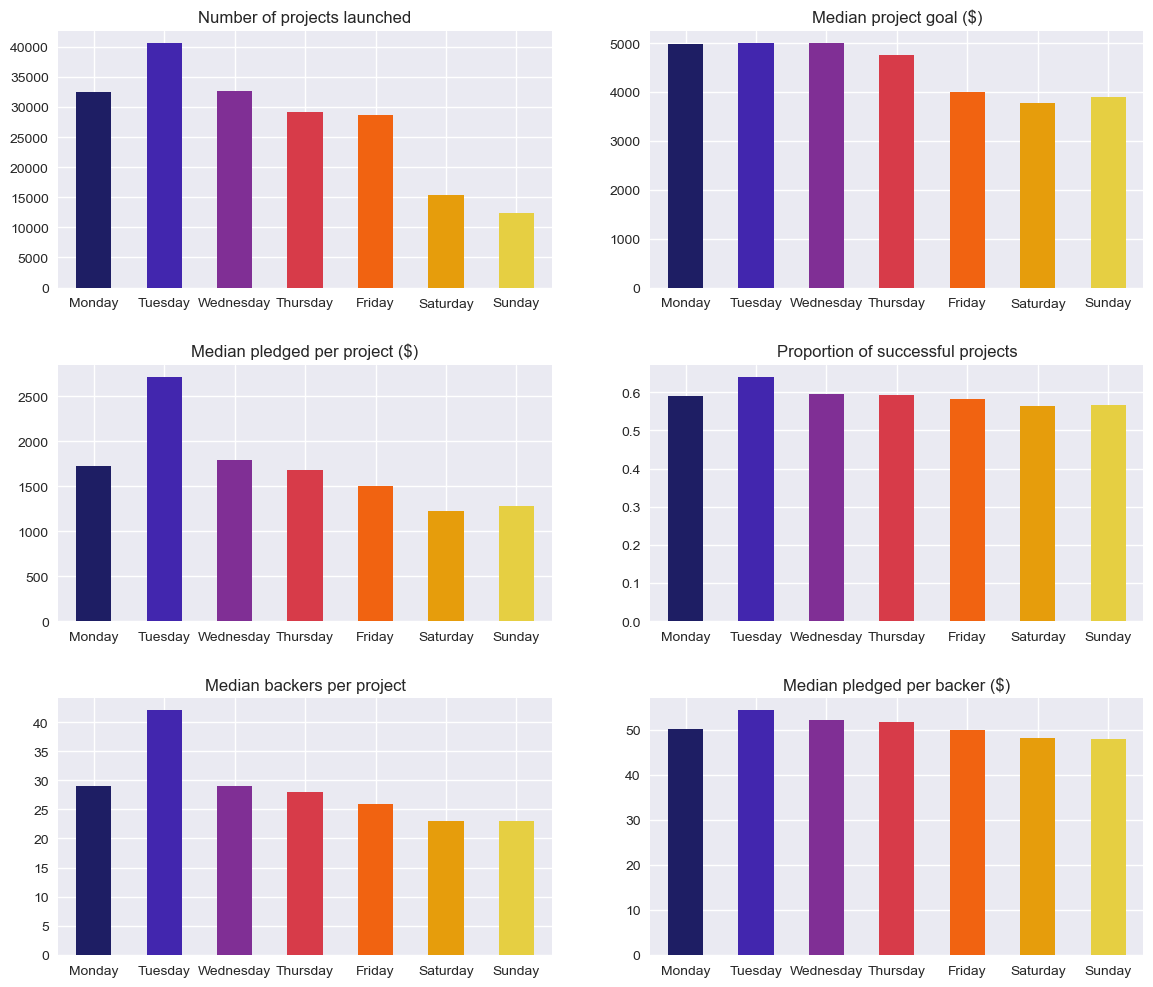

In [126]:
# Creating a dataframe grouped by the day on which they were launched, with columns for failed and successful
day_df = pd.get_dummies(df.set_index('launch_day').state).groupby('launch_day').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.launch_day.nunique()))

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df.groupby('launch_day').launch_day.count().reindex(weekdays).plot(kind='bar', ax=ax1, color=color, rot=0)
ax1.set_title('Number of projects launched')
ax1.set_xlabel('')

df.groupby('launch_day').usd_goal.median().reindex(weekdays).plot(kind='bar', ax=ax2, color=color, rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('launch_day').usd_pledged.median().reindex(weekdays).plot(kind='bar', ax=ax3, color=color, rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

day_df.div(day_df.sum(axis=1), axis=0).successful.reindex(weekdays).plot(kind='bar', ax=ax4, color=color, rot=0) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

df.groupby('launch_day').backers_count.median().reindex(weekdays).plot(kind='bar', ax=ax5, color=color, rot=0)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

df.groupby('launch_day').pledge_per_backer.median().reindex(weekdays).plot(kind='bar', ax=ax6, color=color, rot=0)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

The most popular month to launch a project is July, and the least common is December.
Interestingly, both months have the lowest success rates, lowest median pledge amounts, lowest median backers per project and lowest median amount pledged per backer.
Median goal sizes are roughly similar throughout most of the year, but smaller for projects launched in January.
The best month to launch in is October, which has the highest median amount pledged per project, the highest success rate and the highest number of backers per project.

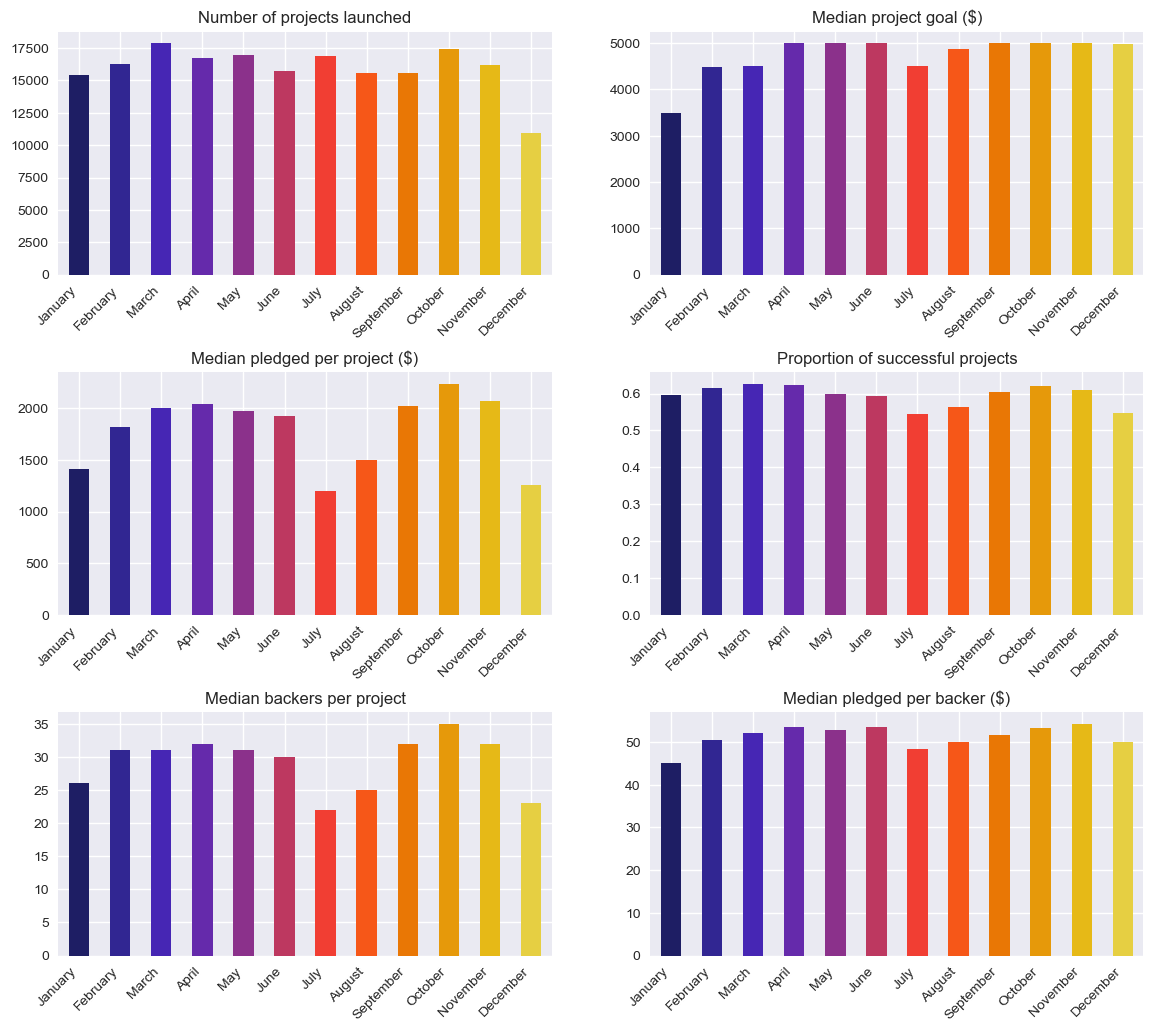

In [127]:
# Creating a dataframe grouped by the month in which they were launched, with columns for failed and successful
month_df = pd.get_dummies(df.set_index('launch_month').state).groupby('launch_month').sum()

# Plotting
months = list(calendar.month_name)[1:]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.launch_month.nunique()))

df.groupby('launch_month').launch_month.count().reindex(months).plot(kind='bar', ax=ax1, color=color, rot=45)
ax1.set_title('Number of projects launched')
ax1.set_xlabel('')
ax1.set_xticklabels(labels=ax1.get_xticklabels(), ha='right')

df.groupby('launch_month').usd_goal.median().reindex(months).plot(kind='bar', ax=ax2, color=color, rot=45)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')
ax2.set_xticklabels(labels=ax2.get_xticklabels(), ha='right')

df.groupby('launch_month').usd_pledged.median().reindex(months).plot(kind='bar', ax=ax3, color=color, rot=45)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')
ax3.set_xticklabels(labels=ax3.get_xticklabels(), ha='right')

month_df.div(month_df.sum(axis=1), axis=0).successful.reindex(months).plot(kind='bar', ax=ax4, color=color, rot=45) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')
ax4.set_xticklabels(labels=ax4.get_xticklabels(), ha='right')

df.groupby('launch_month').backers_count.median().reindex(months).plot(kind='bar', ax=ax5, color=color, rot=45)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')
ax5.set_xticklabels(labels=ax5.get_xticklabels(), ha='right')

df.groupby('launch_month').pledge_per_backer.median().reindex(months).plot(kind='bar', ax=ax6, color=color, rot=45)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')
ax6.set_xticklabels(labels=ax6.get_xticklabels(), ha='right')

fig.subplots_adjust(hspace=0.4)
plt.show()


Unsurprisingly, the number of projects launched peaks during the day in the US (the times below are in UTC/GMT, so e.g. 2pm-4pm in the chart is equal to 9am-11am EST).
More surprisingly, the median amount pledged per project and per backer does vary considerably throughout the day, with projects launched at 12pm-2pm UTC (7am-9am EST) attracting more funding and backers, on average (median), and being more likely to be successful.

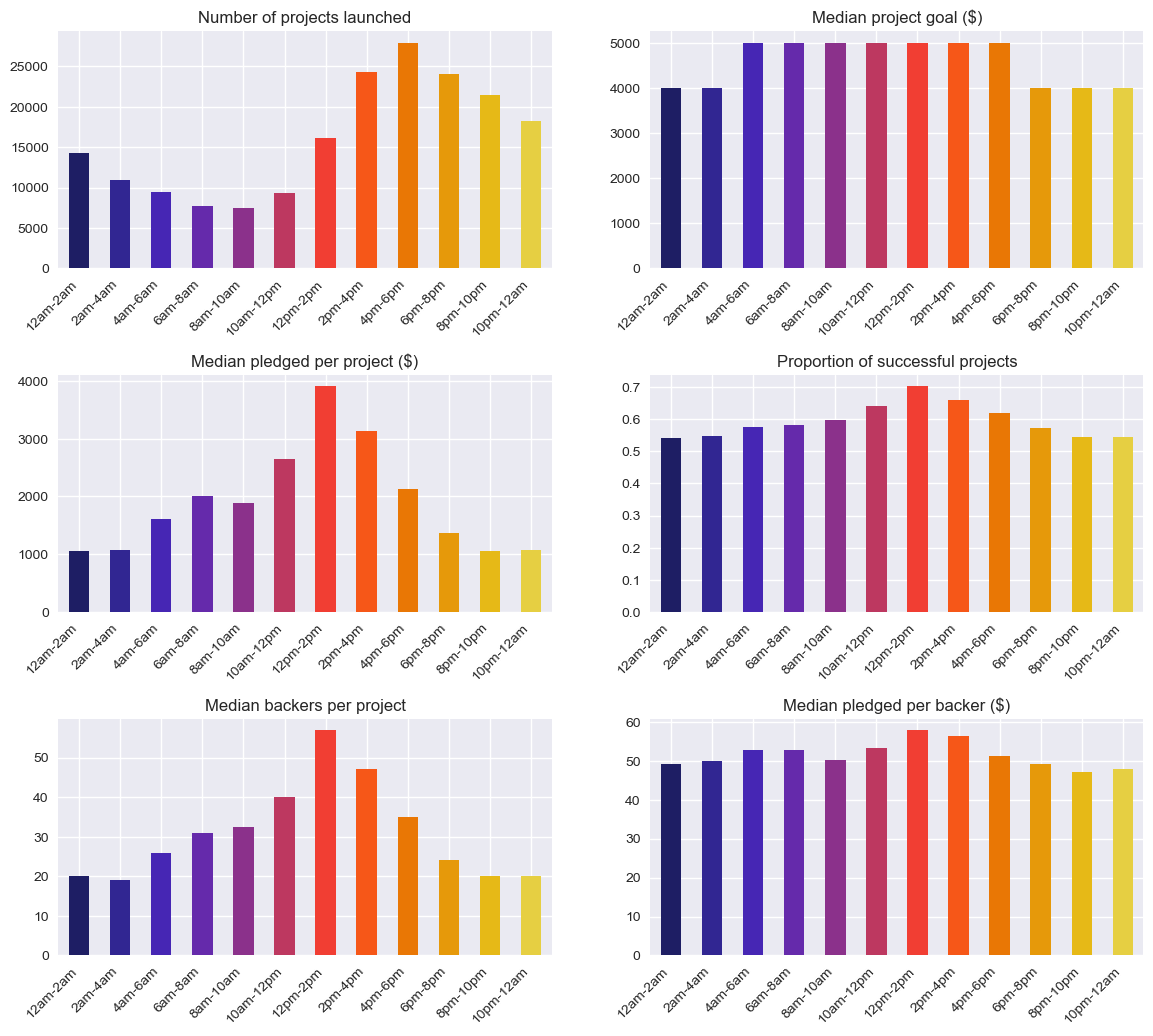

In [128]:
# Creating a dataframe grouped by the time at which they were launched, with columns for failed and successful
time_df = pd.get_dummies(df.set_index('launch_time').state).groupby('launch_time').sum()

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.launch_time.nunique()))

times = ['12am-2am', '2am-4am', '4am-6am', '6am-8am', '8am-10am', '10am-12pm', '12pm-2pm', '2pm-4pm', '4pm-6pm', '6pm-8pm', '8pm-10pm', '10pm-12am']

df.groupby('launch_time').launch_time.count().reindex(times).plot(kind='bar', ax=ax1, color=color, rot=45)
ax1.set_title('Number of projects launched')
ax1.set_xlabel('')
ax1.set_xticklabels(labels=ax1.get_xticklabels(), ha='right')

df.groupby('launch_time').usd_goal.median().reindex(times).plot(kind='bar', ax=ax2, color=color, rot=45)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')
ax2.set_xticklabels(labels=ax2.get_xticklabels(), ha='right')

df.groupby('launch_time').usd_pledged.median().reindex(times).plot(kind='bar', ax=ax3, color=color, rot=45)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')
ax3.set_xticklabels(labels=ax3.get_xticklabels(), ha='right')

time_df.div(time_df.sum(axis=1), axis=0).successful.reindex(times).plot(kind='bar', ax=ax4, color=color, rot=45) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')
ax4.set_xticklabels(labels=ax4.get_xticklabels(), ha='right')

df.groupby('launch_time').backers_count.median().reindex(times).plot(kind='bar', ax=ax5, color=color, rot=45)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')
ax5.set_xticklabels(labels=ax5.get_xticklabels(), ha='right')

df.groupby('launch_time').pledge_per_backer.median().reindex(times).plot(kind='bar', ax=ax6, color=color, rot=45)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')
ax6.set_xticklabels(labels=ax6.get_xticklabels(), ha='right')

fig.subplots_adjust(hspace=0.45)
plt.show()


Checking distributions

Most continuous numerical features other than blurb_length and campaign_days are heavily positively skewed. This is not an issue for some machine learning models, so these features will not be log-transformed for the first few models. After that, models will be ru-run using log-transformed data, to see whether this improves model accuracy.

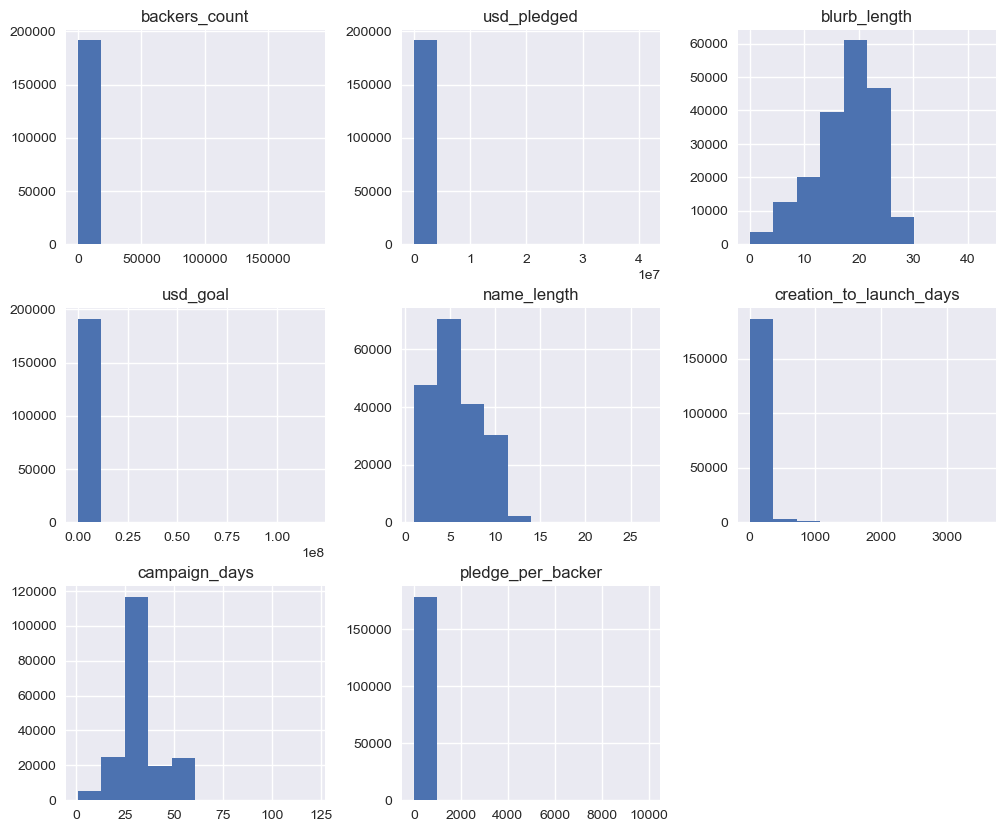

In [129]:
# Checking the distributions of continuous features
df[df.describe().columns].hist(figsize=(12,10));

Preparing the data for machine learning

Some features were retained for EDA purposes, but now need to be dropped in order to use machine learning models. This includes datetime features, features that are related to outcomes (e.g. the amount pledged and the number of backers) rather than related to the properties of the project itself (e.g. category, goal, length of campaign), categorical features which would result in too many one-hot encoded features (sub_category), and features that only have one category (is_starrable).

In [130]:
# Dropping columns and creating new dataframe
df_transformed = df.drop(['backers_count', 'created_at', 'deadline', 'is_starrable', 'launched_at', 'usd_pledged', 'sub_category', 'pledge_per_backer'], axis=1)
df_transformed.head()

,category,country,country_displayable_name,staff_pick,state,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time
id,,,,,,,,,,,,,,,,
888748006,design,US,the United States,True,successful,16.0,100.0,3,4,19,Thursday,Wednesday,March,April,10pm-12am,2am-4am
1635691370,art,US,the United States,False,successful,13.0,5000.0,2,130,30,Monday,Wednesday,June,July,12pm-2pm,12pm-2pm
887441191,food,US,the United States,False,successful,14.0,5000.0,6,0,30,Tuesday,Thursday,May,June,8pm-10pm,8pm-10pm
1015963105,food,US,the United States,False,successful,26.0,5000.0,2,213,30,Thursday,Saturday,March,April,6pm-8pm,6pm-8pm
1328231502,music,US,the United States,False,successful,24.0,500.0,8,0,7,Thursday,Thursday,August,August,8pm-10pm,8pm-10pm


Multi-collinearity will be checked for by assessing correlations between predictor features, as this can cause issues with some models. The multi-collinearity matrix below shows that this is not an issue:

C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\3730191307.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


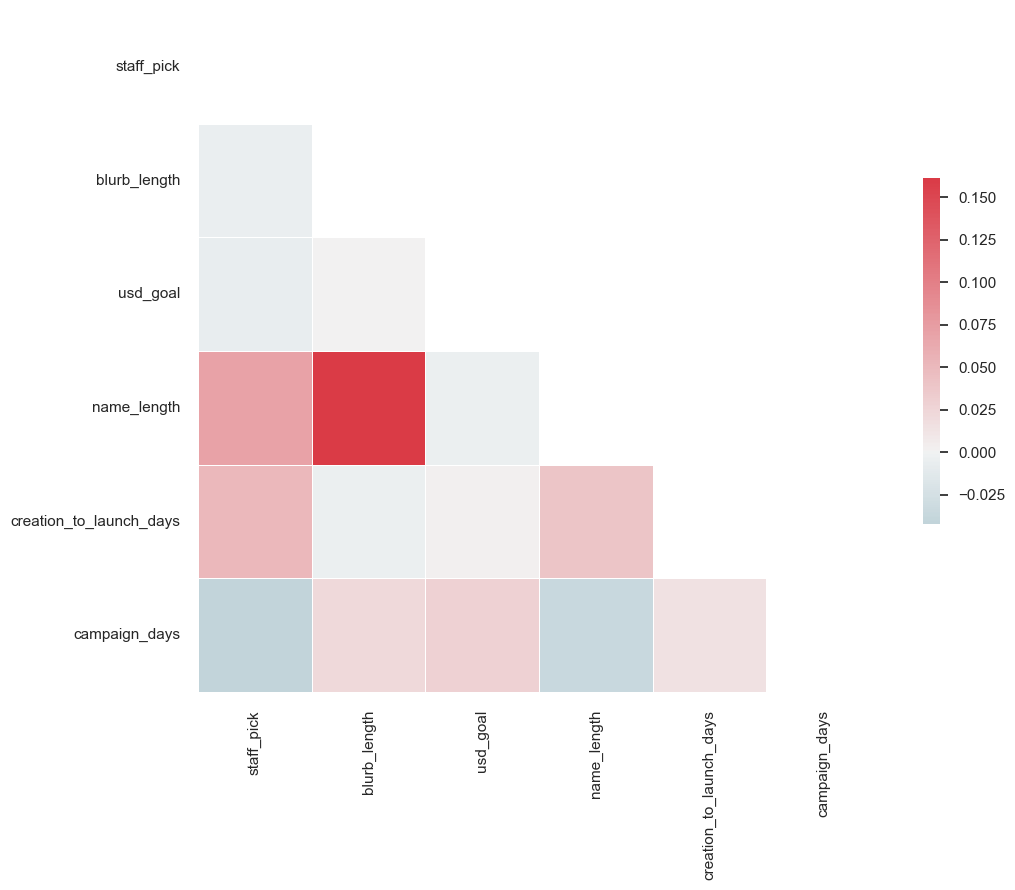

In [131]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df_transformed.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

The dependent variable will now be converted into 1s (successful) and 0s (failure):



In [132]:
df_transformed['state'] = df_transformed['state'].replace({'failed': 0, 'successful': 1})


Categorical features will now be one-hot encoded:



In [133]:
# Converting boolean features to string to include them in one-hot encoding
df_transformed['staff_pick'] = df_transformed['staff_pick'].astype(str)

In [134]:
# Creating dummy variables
df_transformed = pd.get_dummies(df_transformed)


Finally, the dependent (y) and independent (X) features will be separated into separate datasets. Because the features are on different scales, independent features will be transformed and normalised using StandardScaler.

In [135]:
X_unscaled = df_transformed.drop('state', axis=1)
y = df_transformed.state

In [136]:
# Transforming the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled.columns))
X.head()

,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_AT,country_AU,country_BE,country_CA,country_CH,...,deadline_month_September,launch_time_10am-12pm,launch_time_10pm-12am,launch_time_12am-2am,launch_time_12pm-2pm,launch_time_2am-4am,launch_time_2pm-4pm,launch_time_4am-6am,launch_time_4pm-6pm,launch_time_6am-8am,launch_time_6pm-8pm,launch_time_8am-10am,launch_time_8pm-10pm,deadline_time_10am-12pm,deadline_time_10pm-12am,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,-0.322161,-0.036915,-0.995945,-0.323364,-1.144435,-0.345858,-0.202854,-0.190288,-0.128536,5.057998,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,3.07664,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,-0.355266,-0.215313,-0.332702,-0.292097,-0.269576,3.250861,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,-0.345347
1,-0.855346,-0.031895,-1.369107,0.559988,-0.251797,2.891361,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,3.290391,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,-0.355266,-0.215313,-0.332702,-0.292097,3.709523,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,-0.345347
2,-0.677617,-0.031895,0.123541,-0.351407,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,2.814789,-0.215313,-0.332702,-0.292097,-0.269576,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,2.895640
3,1.455122,-0.031895,-1.369107,1.141878,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,2.638992,-0.202295,-0.355266,-0.215313,-0.332702,-0.292097,-0.269576,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,2.809926,-0.187919,-0.345347
4,1.099665,-0.036505,0.869865,-0.351407,-2.118222,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,2.501557,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,2.814789,-0.215313,-0.332702,-0.292097,-0.269576,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,2.895640


## Modeling
In this section, three different machine learning models for classification will be applied to the data, in order to create a model to classify projects into successes and failures.

The two categories are of a roughly equal size, so no measures need to be taken to adjust for inbalanced classes (e.g. SMOTE).

In [137]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

It is good practice to choose an evaluation method before running machine learning models - not after. The weighted average F1 score was chosen. The F1 score calculates the harmonic mean between precision and recall, and is a suitable measure because there is no preference for false positives or false negatives in this case (both are equally bad). The weighted average will be used because the classes are of slightly different sizes, and we want to be able to predict both successes and failures.

### Model 1: vanilla logistic regression
Logistic regression can be used as a binary classifier in order to predict which of two categories a data point falls in to. To create a baseline model to improve upon, a logistic regression model will be fitted to the data, with default parameters.

In [138]:
# Fitting a logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [139]:
# Making predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [140]:

# Logistic regression scores
print("Logistic regression score for training set:", round(logreg.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(logreg.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_hat_test))

Logistic regression score for training set: 0.72853
Logistic regression score for test set: 0.72377

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.56      0.62     23228
           1       0.74      0.84      0.78     34232

    accuracy                           0.72     57460
   macro avg       0.72      0.70      0.70     57460
weighted avg       0.72      0.72      0.72     57460



In [141]:
def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    plt.grid(b=None)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\3487861526.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


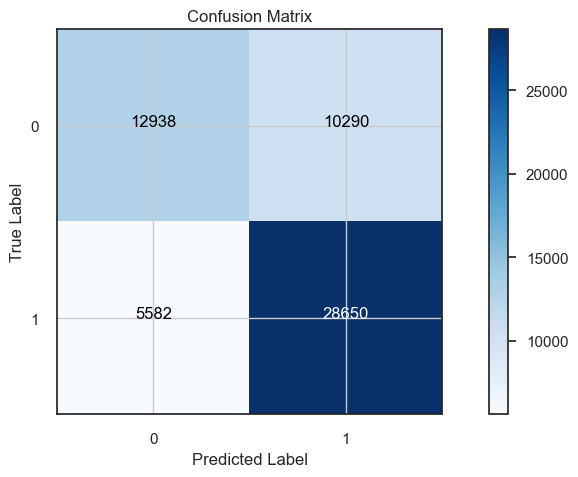

In [142]:

# Confusion matrix
plot_cf(y_test, y_hat_test)

AUC: 0.78663


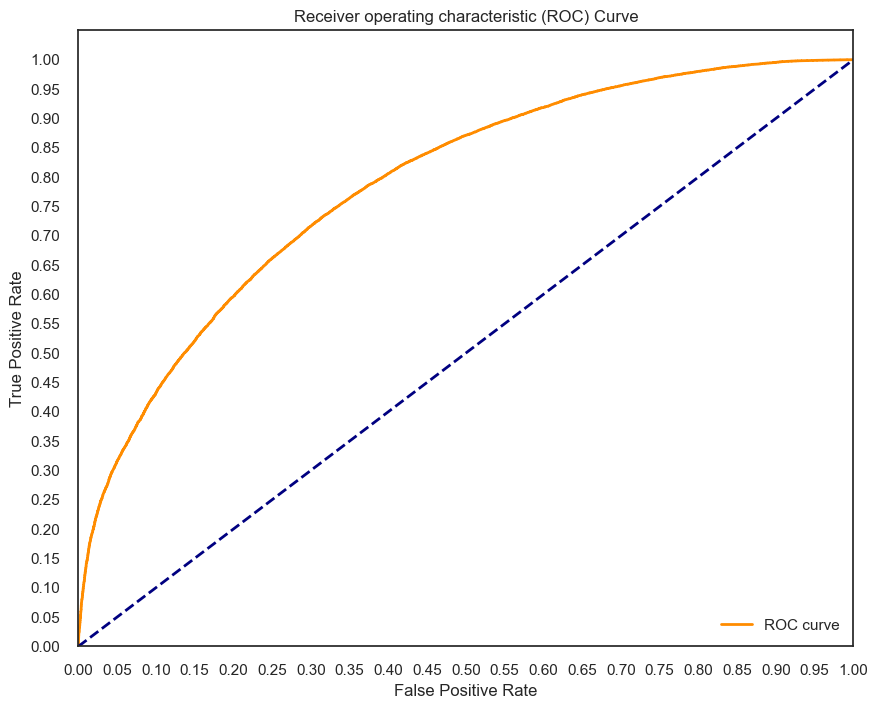

In [143]:
# Plotting the AUC-ROC
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC:', round(auc(fpr, tpr),5))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The logistic regression model has a fairly good accuracy score of around 0.7 (weighted average F1 score), with similar results for the test and train set. However, it is worse at predicting failures compared to successes, and the recall rate (ability to correctly predict positives out of all of the actual positives in the data) is notably different between the failure and success categories. The AUC value is pretty high, and the curve is pulled towards the top left of the graph, which is a positive sign. However, this can probably be improved upon.

### Principal Component Analysis and feature weightings
There are a large number of features in the dataset (106). PCA (Principal Component Analysis) can be used to reduce this into a smaller number of components which still explain as much variation in the data as possible.

In [144]:
pca = PCA()
pca.fit_transform(X)
explained_var = np.cumsum(pca.explained_variance_ratio_)

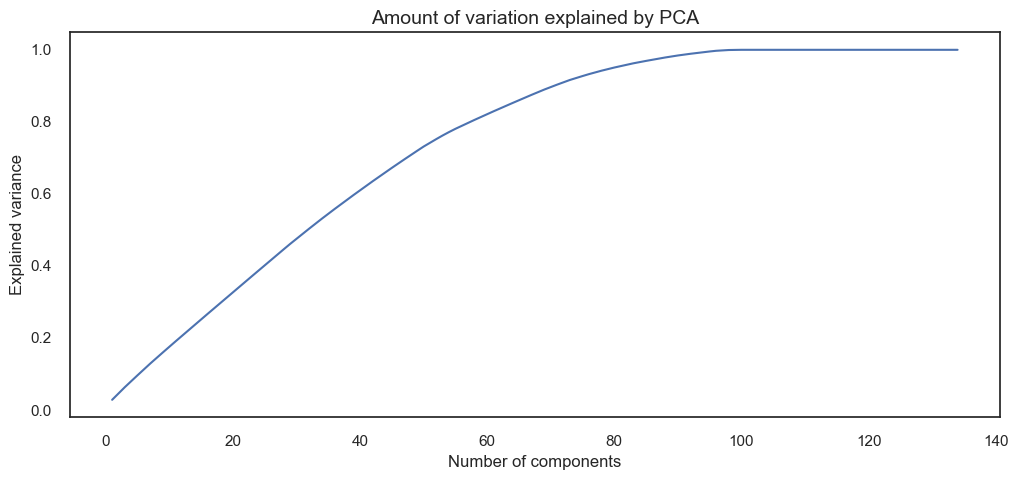

In [145]:
# Plotting the amount of variation explained by PCA with different numbers of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

There is no obvious elbow in this plot, so three different values for n_components will be tried below with logistic regression to see which produces the best score.



In [146]:

print("Number of components explaining 80% of variance:", np.where(explained_var > 0.8)[0][0])
print("Number of components explaining 90% of variance:", np.where(explained_var > 0.9)[0][0])
print("Number of components explaining 99% of variance:", np.where(explained_var > 0.99)[0][0])

Number of components explaining 80% of variance: 57
Number of components explaining 90% of variance: 70
Number of components explaining 99% of variance: 92


The number of components to be used will be assessed by running logistic regression models using each of the three numbers of components.



In [147]:
n_comps = [58,70,90]
for n in n_comps:
    pipe = Pipeline([('pca', PCA(n_components=n)), ('clf', LogisticRegression())])
    pipe.fit(X_train, y_train)
    print("\nNumber of components:", n)
    print("Score:", round(pipe.score(X_test, y_test),5))


Number of components: 58
Score: 0.68077

Number of components: 70
Score: 0.70037

Number of components: 90
Score: 0.72285


The above results show that the score is highest for 90 components, although the difference is small (c. 3% improvement from 58 components).



In [148]:
# Feature weightings on each component, in order of average weighting
pca = PCA(n_components=90)
pca.fit_transform(X)
pca_90_components = pd.DataFrame(pca.components_,columns=X.columns).T # Components as columns, features as rows
pca_90_components['mean_weight'] = pca_90_components.iloc[:].abs().mean(axis=1)
pca_90_components.sort_values('mean_weight', ascending=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,mean_weight
deadline_day_Thursday,0.007127,0.129690,0.072735,-0.002450,0.033940,0.015436,0.001986,-0.001780,-0.030161,0.016076,-0.026544,-0.010684,0.042933,-0.026425,0.018449,-0.024046,0.012403,-0.001635,0.019066,0.028744,-0.009714,-0.009710,0.005745,0.003048,0.016860,...,0.013113,-0.002298,0.054720,0.062829,0.248648,-0.128483,-0.150724,-0.054691,-0.124752,0.195404,0.432310,0.271775,-0.003461,0.023299,0.014409,0.002995,0.007875,-0.016285,-0.003504,-0.037825,0.005069,0.017139,0.016051,0.010712,0.056925
launch_time_2am-4am,-0.078120,-0.085336,0.074567,0.085808,0.042303,-0.049437,0.053208,-0.019379,-0.000334,-0.021133,0.010621,-0.002983,-0.006463,0.012450,0.007541,0.019601,-0.025216,0.023380,-0.003163,-0.002824,-0.000645,-0.002719,-0.009777,0.001434,0.000427,...,-0.020511,0.006069,-0.023477,-0.007138,0.012790,-0.007248,-0.019970,-0.012386,-0.004791,0.051802,0.015279,0.026340,0.004976,-0.386370,-0.009323,-0.022887,-0.437506,-0.038850,0.031853,0.183602,0.036056,-0.165265,-0.108777,-0.115032,0.055646
deadline_time_2am-4am,-0.101994,-0.042470,0.074455,0.080211,0.057571,-0.072096,0.045700,-0.043744,-0.013423,-0.009158,0.008120,0.006781,-0.004162,0.017474,0.011431,0.014842,-0.026276,0.025158,-0.004281,-0.006208,-0.001227,-0.004759,-0.008411,0.001256,0.002731,...,-0.014624,-0.002602,-0.008959,-0.023316,-0.007199,-0.024408,0.013951,0.017501,0.000155,-0.032797,-0.013029,-0.029090,-0.006096,0.369991,0.000498,0.021183,0.427762,0.038399,-0.033945,-0.182181,-0.035180,0.163302,0.109631,0.108373,0.055552
launch_month_December,0.009023,-0.122758,0.031769,-0.032887,-0.045304,0.151814,0.014211,0.074698,0.072723,-0.044647,-0.000144,-0.121661,-0.061552,0.019357,-0.062854,-0.009561,0.059274,0.004436,-0.003233,0.015532,0.001764,0.049260,0.035418,0.023045,-0.007974,...,-0.010962,0.000667,-0.001382,-0.004773,0.026439,0.011784,0.027607,-0.019281,-0.014372,-0.000010,-0.017753,0.020635,0.347221,0.018625,-0.220275,0.124198,0.001686,-0.019552,0.220099,-0.065609,0.164753,0.014484,-0.001267,-0.004919,0.055258
launch_time_4am-6am,-0.056503,-0.075959,0.078203,0.067276,0.036353,0.040079,0.029267,-0.037798,0.021338,-0.037214,-0.003086,-0.014106,-0.022129,0.011909,0.002213,0.019351,-0.011660,0.007361,0.004859,0.009917,-0.014167,-0.006391,0.004169,0.004613,0.001164,...,-0.027100,-0.004246,-0.018006,-0.022515,-0.005684,-0.011524,-0.035108,-0.015909,0.009385,0.038425,-0.020813,0.036333,-0.014339,0.540817,-0.013720,-0.000150,-0.128723,0.172012,0.036369,0.274126,0.089243,-0.120739,-0.116247,-0.050455,0.054975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usd_goal,-0.000555,-0.009505,0.004100,-0.002400,-0.011199,-0.002095,-0.005629,0.001958,0.003163,0.002104,0.001970,0.008313,-0.006127,-0.001274,0.008073,0.002583,-0.002736,-0.003063,0.002682,0.010475,-0.002836,-0.002020,0.000073,0.003326,-0.001020,...,0.111228,0.898005,0.220454,-0.017034,0.094584,0.027467,0.049648,-0.021752,0.009984,-0.002215,0.004011,-0.016784,0.005072,0.004431,0.000912,0.006131,-0.000308,-0.003265,0.010069,0.000347,0.000523,0.002260,0.000251,-0.001523,0.030253
country_displayable_name_Luxembourg,0.014172,-0.007018,0.001182,-0.006655,-0.029473,0.009625,-0.032258,0.007342,-0.052583,-0.044648,-0.037266,0.004208,-0.017565,0.005423,0.011954,-0.002183,-0.036447,0.005820,-0.003988,-0.080982,0.042585,-0.002006,0.074253,0.145882,-0.431497,...,-0.003128,0.000310,-0.000140,-0.003355,-0.004515,-0.000725,0.001469,-0.001367,-0.000790,-0.000638,0.001146,0.001641,0.001177,-0.000793,-0.002789,-0.001807,0.000088,-0.001901,-0.000641,0.000933,0.000057,0.003212,-0.001155,0.001693,0.025039
country_LU,0.014172,-0.007018,0.001182,-0.006655,-0.029473,0.009625,-0.032258,0.007342,-0.052583,-0.044648,-0.037266,0.004208,-0.017565,0.

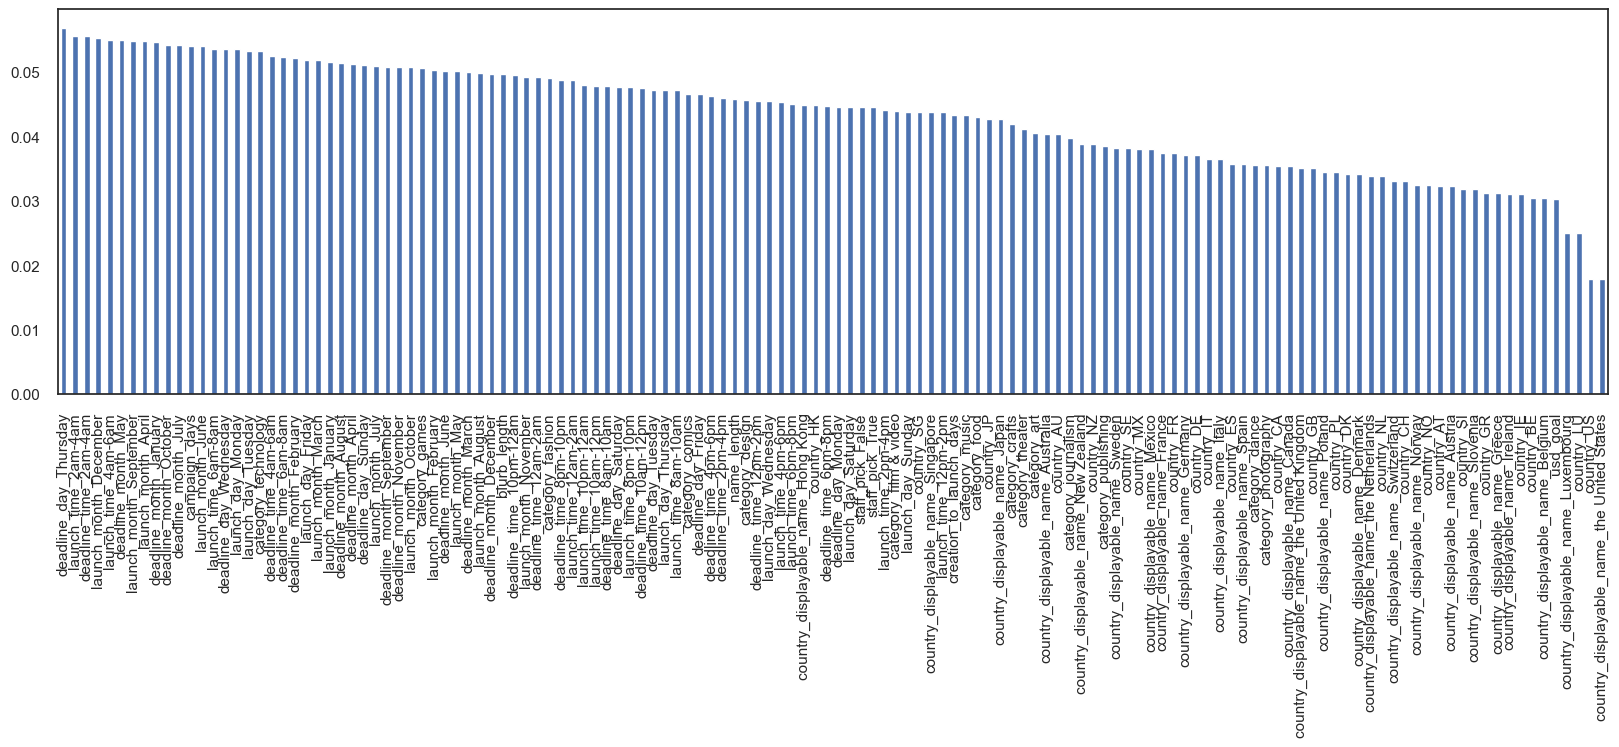

In [149]:
# Plotting feature importances
plt.figure(figsize=(20,5))
pca_90_components.mean_weight.sort_values(ascending=False).plot(kind='bar')
plt.show()

The tables below show the top 10 most important features in the top three most important components.

- Component 1 - the top two features relate to the country a project is from, primarily the US and the UK (the top two most common countries).
- Component 2 - the top two features relate to whether or not a project was highlighted as a staff pick.
- Component 3 - the top two features relate to the timings of the project, specifically whether it was launched in October or had a deadline in November.

In [150]:
pca_90_components[0].map(lambda x : x).abs().sort_values(ascending = False)[:10]


country_displayable_name_the United States     0.492909
country_US                                     0.492909
country_displayable_name_the United Kingdom    0.294315
country_GB                                     0.294315
deadline_time_10am-12pm                        0.150413
launch_time_10am-12pm                          0.138571
launch_time_8am-10am                           0.138499
deadline_time_8am-10am                         0.126283
country_displayable_name_Canada                0.117642
country_CA                                     0.117642
Name: 0, dtype: float64

In [151]:
pca_90_components[1].map(lambda x : x).abs().sort_values(ascending = False)[:10]


staff_pick_False                               0.340717
staff_pick_True                                0.340717
country_AU                                     0.189668
country_displayable_name_Australia             0.189668
country_displayable_name_the United Kingdom    0.184704
country_GB                                     0.184704
launch_time_12pm-2pm                           0.184498
launch_time_2pm-4pm                            0.182329
country_MX                                     0.180371
country_displayable_name_Mexico                0.180371
Name: 1, dtype: float64

In [152]:
pca_90_components[2].map(lambda x : x).abs().sort_values(ascending = False)[:10]


country_displayable_name_the United Kingdom    0.364215
country_GB                                     0.364215
country_displayable_name_Hong Kong             0.275630
country_HK                                     0.275630
launch_time_6pm-8pm                            0.158720
deadline_time_6pm-8pm                          0.158640
deadline_time_2pm-4pm                          0.153698
launch_time_2pm-4pm                            0.152975
country_CA                                     0.149709
country_displayable_name_Canada                0.149709
Name: 2, dtype: float64

### Model 2: logistic regression with PCA and parameter optimisation
The logistic regression model can potentially be further improved by optimising its parameters. GridSearchCV can be used to test multiple different regularisation parameters (values of C), penalties (l1 or l2) and models with and without an intercept.

In [153]:
# Using GridSearchCV to test multiple different parameters
logreg_start = time.time()

pipe_logreg = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', LogisticRegression())])

params_logreg = [
    {'clf__penalty': ['l1', 'l2'],
     'clf__fit_intercept': [True, False],
        'clf__C': [0.001, 0.01, 1, 10]
    }
]

grid_logreg = GridSearchCV(estimator=pipe_logreg,
                  param_grid=params_logreg,
                  cv=5)

grid_logreg.fit(X_train, y_train)

logreg_end = time.time()

logreg_best_score = grid_logreg.best_score_
logreg_best_params = grid_logreg.best_params_

print(f"Time taken to run: {round((logreg_end - logreg_start)/60,1)} minutes")
print("Best accuracy:", round(logreg_best_score,2))
print("Best parameters:", logreg_best_params)

c:\Users\Abdel Abdalla\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Abdel Abdalla\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Abdel Abdalla\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Abdel Abdalla\miniconda3\envs\minimal_ds\lib\site-packages\sklearn\

Time taken to run: 8.6 minutes
Best accuracy: 0.73
Best parameters: {'clf__C': 10, 'clf__fit_intercept': False, 'clf__penalty': 'l2'}


Best logistic regression model

Logistic regression score for training set: 0.72831
Logistic regression score for test set: 0.72369

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.55      0.62     23228
           1       0.73      0.84      0.78     34232

    accuracy                           0.72     57460
   macro avg       0.72      0.70      0.70     57460
weighted avg       0.72      0.72      0.72     57460



C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\3487861526.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


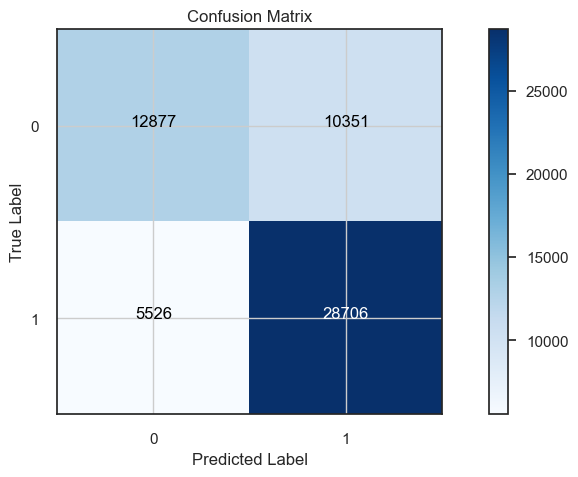

In [154]:
pipe_best_logreg = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', LogisticRegression(C=10, fit_intercept=True, penalty='l2'))])

pipe_best_logreg.fit(X_train, y_train)

lr_y_hat_train = pipe_best_logreg.predict(X_train)
lr_y_hat_test = pipe_best_logreg.predict(X_test)

print("Logistic regression score for training set:", round(pipe_best_logreg.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(pipe_best_logreg.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, lr_y_hat_test))
plot_cf(y_test, lr_y_hat_test)

After hyperparameter tuning, the model's accuracy score is the same as the logistic regression model using default parameters (0.70 weighted average F1 score).

### Model 3: Random Forests
The Random Forest algorithm is a supervised learning algorithm that can be used for classification. It works by building multiple different decision trees to predict which category a data point belongs to.

In [155]:
# Random Forests with default settings
pipe_rf = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', RandomForestClassifier())])
pipe_rf.fit(X_train, y_train)
print("Score:", round(pipe_rf.score(X_test, y_test),5))

Score: 0.70292


In [156]:
# Reporting the depths of each tree in the model created by the default Random Forest classifier, to get a sense of the
# maximum depth that a tree can be if depth is not limited, to help with choosing parameters to try with GridSearchCV
[estimator.tree_.max_depth for estimator in pipe_rf.named_steps['clf'].estimators_]

[51,
 51,
 44,
 51,
 44,
 49,
 50,
 55,
 48,
 45,
 52,
 51,
 47,
 69,
 50,
 46,
 49,
 51,
 51,
 52,
 64,
 46,
 51,
 41,
 44,
 47,
 46,
 59,
 55,
 55,
 56,
 44,
 49,
 54,
 57,
 48,
 50,
 47,
 51,
 48,
 53,
 52,
 52,
 51,
 54,
 63,
 49,
 51,
 52,
 48,
 58,
 55,
 56,
 51,
 51,
 53,
 57,
 53,
 60,
 58,
 46,
 69,
 59,
 48,
 49,
 45,
 56,
 57,
 52,
 57,
 64,
 63,
 58,
 49,
 57,
 52,
 55,
 60,
 42,
 53,
 47,
 57,
 53,
 48,
 60,
 51,
 50,
 51,
 45,
 54,
 63,
 44,
 56,
 59,
 44,
 60,
 62,
 47,
 56,
 48]

In [157]:
# Using GridSearchCV to test multiple different parameters
rf_start = time.time()

pipe_rf = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', RandomForestClassifier())])

params_rf = [ 
  {'clf__n_estimators': [100],
   'clf__max_depth': [20, 30, 40],    
   'clf__min_samples_split':[0.001, 0.01]
  }
]

grid_rf = GridSearchCV(estimator=pipe_rf,
                  param_grid=params_rf,
                  cv=5)

grid_rf.fit(X_train, y_train)

rf_end = time.time()

rf_best_score = grid_rf.best_score_
rf_best_params = grid_rf.best_params_

print(f"Time taken to run: {round((rf_end - rf_start)/60,1)} minutes")
print("Best accuracy:", round(rf_best_score,2))
print("Best parameters:", rf_best_params)

Time taken to run: 115.5 minutes
Best accuracy: 0.71
Best parameters: {'clf__max_depth': 30, 'clf__min_samples_split': 0.001, 'clf__n_estimators': 100}


Best random forest model

Random Forest score for training set: 0.78247
Random Forest score for test set: 0.70942

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.51      0.59     23228
           1       0.72      0.84      0.78     34232

    accuracy                           0.71     57460
   macro avg       0.70      0.68      0.68     57460
weighted avg       0.71      0.71      0.70     57460



C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\3487861526.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


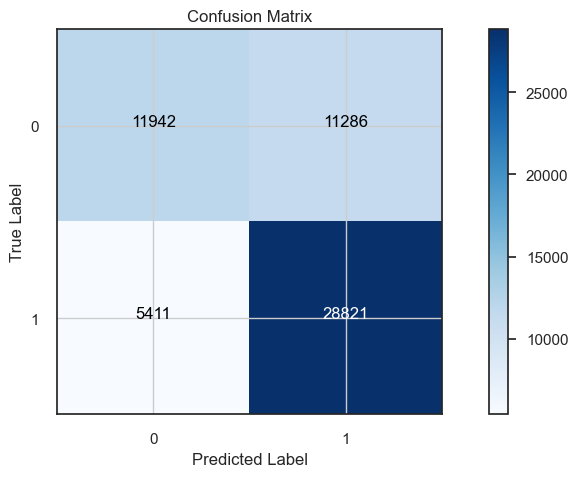

In [158]:
pipe_best_rf = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', RandomForestClassifier(max_depth=30, min_samples_split=0.001, n_estimators=100))])

pipe_best_rf.fit(X_train, y_train)

rf_y_hat_train = pipe_best_rf.predict(X_train)
rf_y_hat_test = pipe_best_rf.predict(X_test)

print("Random Forest score for training set:", round(pipe_best_rf.score(X_train, y_train),5))
print("Random Forest score for test set:", round(pipe_best_rf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, rf_y_hat_test))
plot_cf(y_test, rf_y_hat_test)


### Model 4: XGBoost
XGBoost is a form of gradient boosting algorithm. Similar to Random Forests, it is an ensemble method that produces multiple decision trees to improve classification of data points, but it uses gradient descent to improve the performance of the model for the data points that are particularly difficult to classify.


In [159]:
# XGBoost with default settings
pipe_xgb = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', xgb.XGBClassifier())])
pipe_xgb.fit(X_train, y_train)
print("Score:", round(pipe_xgb.score(X_test, y_test),5))

Score: 0.71069


In [160]:
# Using GridSearchCV to test multiple different parameters
xgb_start = time.time()

pipe_xgb = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', xgb.XGBClassifier())])

params_xgb = [ 
  {'clf__n_estimators': [100],
   'clf__max_depth': [25, 35],
   'clf__learning_rate': [0.01, 0.1],
   'clf__subsample': [0.7, 1],
   'clf__min_child_weight': [20, 100]
  }
]

grid_xgb = GridSearchCV(estimator=pipe_xgb,
                  param_grid=params_xgb,
                  cv=5)

grid_xgb.fit(X_train, y_train)

xgb_end = time.time()

xgb_best_score = grid_xgb.best_score_
xgb_best_params = grid_xgb.best_params_

print(f"Time taken to run: {round((xgb_end - xgb_start)/60,1)} minutes")
print("Best accuracy:", round(xgb_best_score,2))
print("Best parameters:", xgb_best_params)

Time taken to run: 262.6 minutes
Best accuracy: 0.72
Best parameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 25, 'clf__min_child_weight': 100, 'clf__n_estimators': 100, 'clf__subsample': 1}


Results from the XGBoost parameter optimisation:

- Time taken to run: 865.4 minutes (14.4 hours)
- Best accuracy: 0.7
- Best parameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 35, 'clf__min_child_weight': 100, 'clf__n_estimators': 100, - 'clf__subsample': 0.7}

Best XGBoost model

XGBoost score for training set: 0.78531
XGBoost score for test set: 0.7157

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62     23228
           1       0.74      0.81      0.77     34232

    accuracy                           0.72     57460
   macro avg       0.71      0.69      0.70     57460
weighted avg       0.71      0.72      0.71     57460



C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\3487861526.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


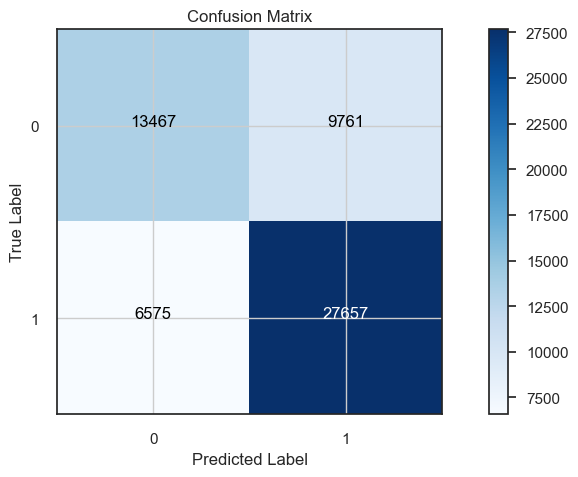

In [161]:
pipe_best_xgb = Pipeline([('pca', PCA(n_components=90)),
                    ('clf', xgb.XGBClassifier(learning_rate=0.1, max_depth=35, min_child_weight=100, n_estimators=100, subsample=0.7))])

pipe_best_xgb.fit(X_train, y_train)

xgb_y_hat_train = pipe_best_xgb.predict(X_train)
xgb_y_hat_test = pipe_best_xgb.predict(X_test)

print("XGBoost score for training set:", round(pipe_best_xgb.score(X_train, y_train),5))
print("XGBoost score for test set:", round(pipe_best_xgb.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, xgb_y_hat_test))
plot_cf(y_test, xgb_y_hat_test)

After hyperparameter tuning, the model's accuracy has increased from 0.69 to 0.7, although this is a very small increase for a very computationally-expensive hyperparameter tuning process. There also appears to be some over-fitting, from the difference in train and test scores.

### Model 5: vanilla logistic regression with log-transformed data
Previously, positively skewed data was not log-transformed. Now a log transformation will be applied to the skewed features, and a logistic regression model fitted again to see whether this improved accuracy.

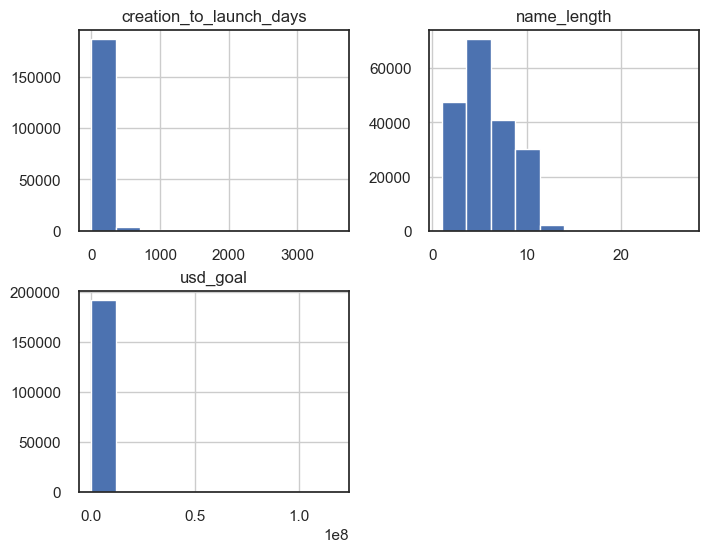

In [162]:
# Assessing skewed distributions
cols_to_log = ['creation_to_launch_days', 'name_length', 'usd_goal']
df_transformed[cols_to_log].hist(figsize=(8,6));

In [163]:
# Replacing 0s with 0.01 and log-transforming
for col in cols_to_log:
    df_transformed[col] = df_transformed[col].astype('float64').replace(0.0, 0.01)
    df_transformed[col] = np.log(df_transformed[col])

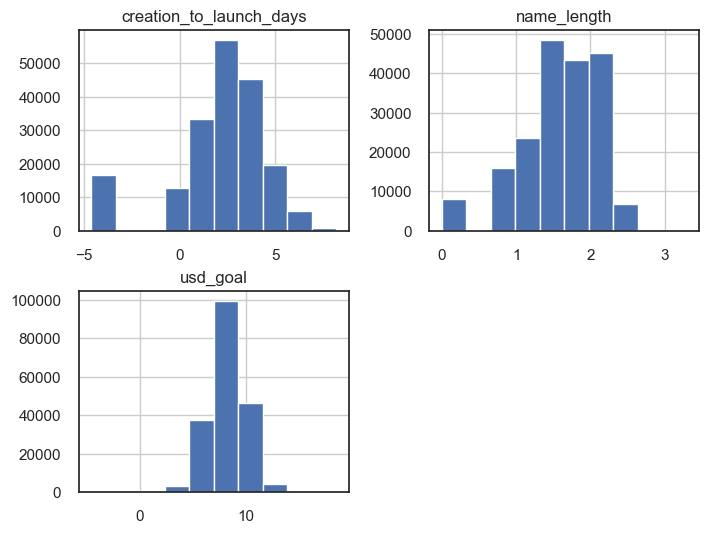

In [164]:
# Checking new distributions
df_transformed[cols_to_log].hist(figsize=(8,6));

In [165]:
df_transformed.head()

,state,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_AT,country_AU,country_BE,country_CA,...,deadline_month_September,launch_time_10am-12pm,launch_time_10pm-12am,launch_time_12am-2am,launch_time_12pm-2pm,launch_time_2am-4am,launch_time_2pm-4pm,launch_time_4am-6am,launch_time_4pm-6pm,launch_time_6am-8am,launch_time_6pm-8pm,launch_time_8am-10am,launch_time_8pm-10pm,deadline_time_10am-12pm,deadline_time_10pm-12am,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
888748006,1,16.0,4.605170,1.098612,1.386294,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1635691370,1,13.0,8.517193,0.693147,4.867534,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
887441191,1,14.0,8.517193,1.791759,-4.605170,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1015963105,1,26.0,8.517193,0.693147,5.361292,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1328231502,1,24.0,6.214608,2.079442,-4.605170,7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


Now the data can be prepared again for machine learning by separating X and y, and scaling:

In [166]:
X_unscaled_log = df_transformed.drop('state', axis=1)
y_log = df_transformed.state

In [167]:
# Transforming the data
scaler = StandardScaler()
X_log = pd.DataFrame(scaler.fit_transform(X_unscaled_log), columns=list(X_unscaled_log.columns))
X_log.head()

,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_AT,country_AU,country_BE,country_CA,country_CH,...,deadline_month_September,launch_time_10am-12pm,launch_time_10pm-12am,launch_time_12am-2am,launch_time_12pm-2pm,launch_time_2am-4am,launch_time_2pm-4pm,launch_time_4am-6am,launch_time_4pm-6pm,launch_time_6am-8am,launch_time_6pm-8pm,launch_time_8am-10am,launch_time_8pm-10pm,deadline_time_10am-12pm,deadline_time_10pm-12am,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,-0.322161,-2.171975,-0.859153,-0.279772,-1.144435,-0.345858,-0.202854,-0.190288,-0.128536,5.057998,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,3.07664,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,-0.355266,-0.215313,-0.332702,-0.292097,-0.269576,3.250861,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,-0.345347
1,-0.855346,0.099612,-1.561905,1.086264,-0.251797,2.891361,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,3.290391,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,-0.355266,-0.215313,-0.332702,-0.292097,3.709523,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,-0.345347
2,-0.677617,0.099612,0.342210,-2.630818,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,2.814789,-0.215313,-0.332702,-0.292097,-0.269576,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,2.895640
3,1.455122,0.099612,-1.561905,1.280014,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,2.638992,-0.202295,-0.355266,-0.215313,-0.332702,-0.292097,-0.269576,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,2.809926,-0.187919,-0.345347
4,1.099665,-1.237426,0.840820,-2.630818,-2.118222,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,2.501557,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.292917,-0.225727,-0.32503,-0.284029,-0.303915,-0.246472,-0.380822,-0.228562,-0.413258,-0.205117,-0.378932,-0.202295,2.814789,-0.215313,-0.332702,-0.292097,-0.269576,-0.307611,-0.336416,-0.306328,-0.378311,-0.246984,-0.355881,-0.187919,2.895640


In [168]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.3, random_state=123)

Logistic regression score for training set: 0.75091
Logistic regression score for test set: 0.74803

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.62      0.67     23228
           1       0.77      0.83      0.80     34232

    accuracy                           0.75     57460
   macro avg       0.74      0.73      0.73     57460
weighted avg       0.75      0.75      0.74     57460



C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\3487861526.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


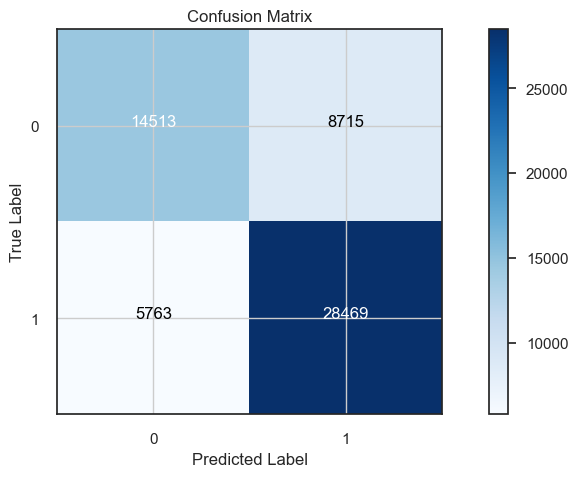

In [169]:
# Fitting a logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Making predictions
lr_y_hat_train2 = logreg.predict(X_train)
lr_y_hat_test2 = logreg.predict(X_test)

# Logistic regression scores
print("Logistic regression score for training set:", round(logreg.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(logreg.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, lr_y_hat_test2))
# Confusion matrix
plot_cf(y_test, lr_y_hat_test2)

Log-transforming the data has increased the accuracy by 0.03 to 0.73.

### Model 6: Random Forests without PCA
A Random Forest model will now be fitted using the log-transformed data, but without using PCA. This is to allow for the construction of a list of feature importances.

In [170]:
# Using GridSearchCV to test multiple different parameters
rf_start2 = time.time()

rf2 = RandomForestClassifier(min_samples_split=0.001, verbose=2)

params_rf2 = [ 
  {'n_estimators': [200, 400],
   'max_depth': [20, 35]
  }
]

grid_rf2 = GridSearchCV(estimator=rf2, param_grid=params_rf2, cv=5)

grid_rf2.fit(X_train, y_train)

rf_end2 = time.time()

rf_best_score2 = grid_rf2.best_score_
rf_best_params2 = grid_rf2.best_params_

print(f"Time taken to run: {round((rf_end2 - rf_start2)/60,1)} minutes")
print("Best accuracy:", round(rf_best_score2,2))
print("Best parameters:", rf_best_params2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   45.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   44.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   45.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   46.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   45.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   40.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   41.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   42.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   41.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   40.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
b

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.8min finished


Results:

- Time taken to run: 20.6 minutes
- Best accuracy: 0.75
- Best parameters: {'max_depth': 35, 'n_estimators': 400}

Random Forest score for training set: 0.78768
Random Forest score for test set: 0.75908

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.62      0.67     23228
           1       0.77      0.86      0.81     34232

    accuracy                           0.76     57460
   macro avg       0.76      0.74      0.74     57460
weighted avg       0.76      0.76      0.75     57460



C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\3487861526.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


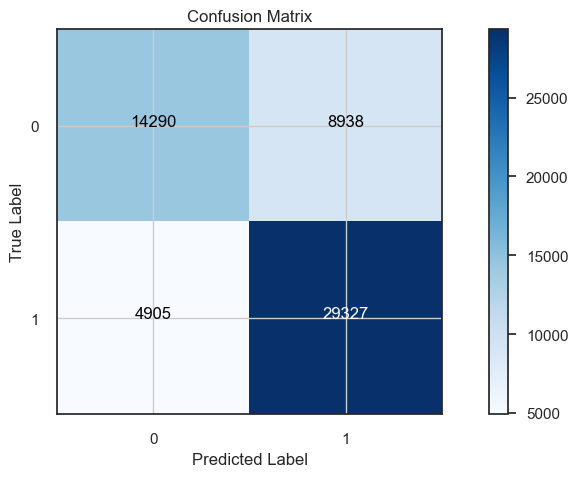

In [171]:
best_rf = RandomForestClassifier(max_depth=35, min_samples_split=0.001, n_estimators=400)

best_rf.fit(X_train, y_train)

rf_y_hat_train2 = best_rf.predict(X_train)
rf_y_hat_test2 = best_rf.predict(X_test)

print("Random Forest score for training set:", round(best_rf.score(X_train, y_train),5))
print("Random Forest score for test set:", round(best_rf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, rf_y_hat_test2))
plot_cf(y_test, rf_y_hat_test2)

By log-transforming features and increasing the number of trees created (n_estimators), it was possible to improve the weighted average F1 score to 0.74. Overfitting does not appear to be an issue.

Because PCA was not used, it was possible to plot feature importance (see graph below).

- Goal size is the most important feature, followed by the number of days taken from project creation to launch, and whether or not the project was a staff pick.
- Campaign length and name length were also fairly important.
- Project type (category) was less important, although whether or not a project was a technology and food project does seem to be fairly important.
- Launch and deadline time, day and month is not very important.
- Country of origin is not very important.

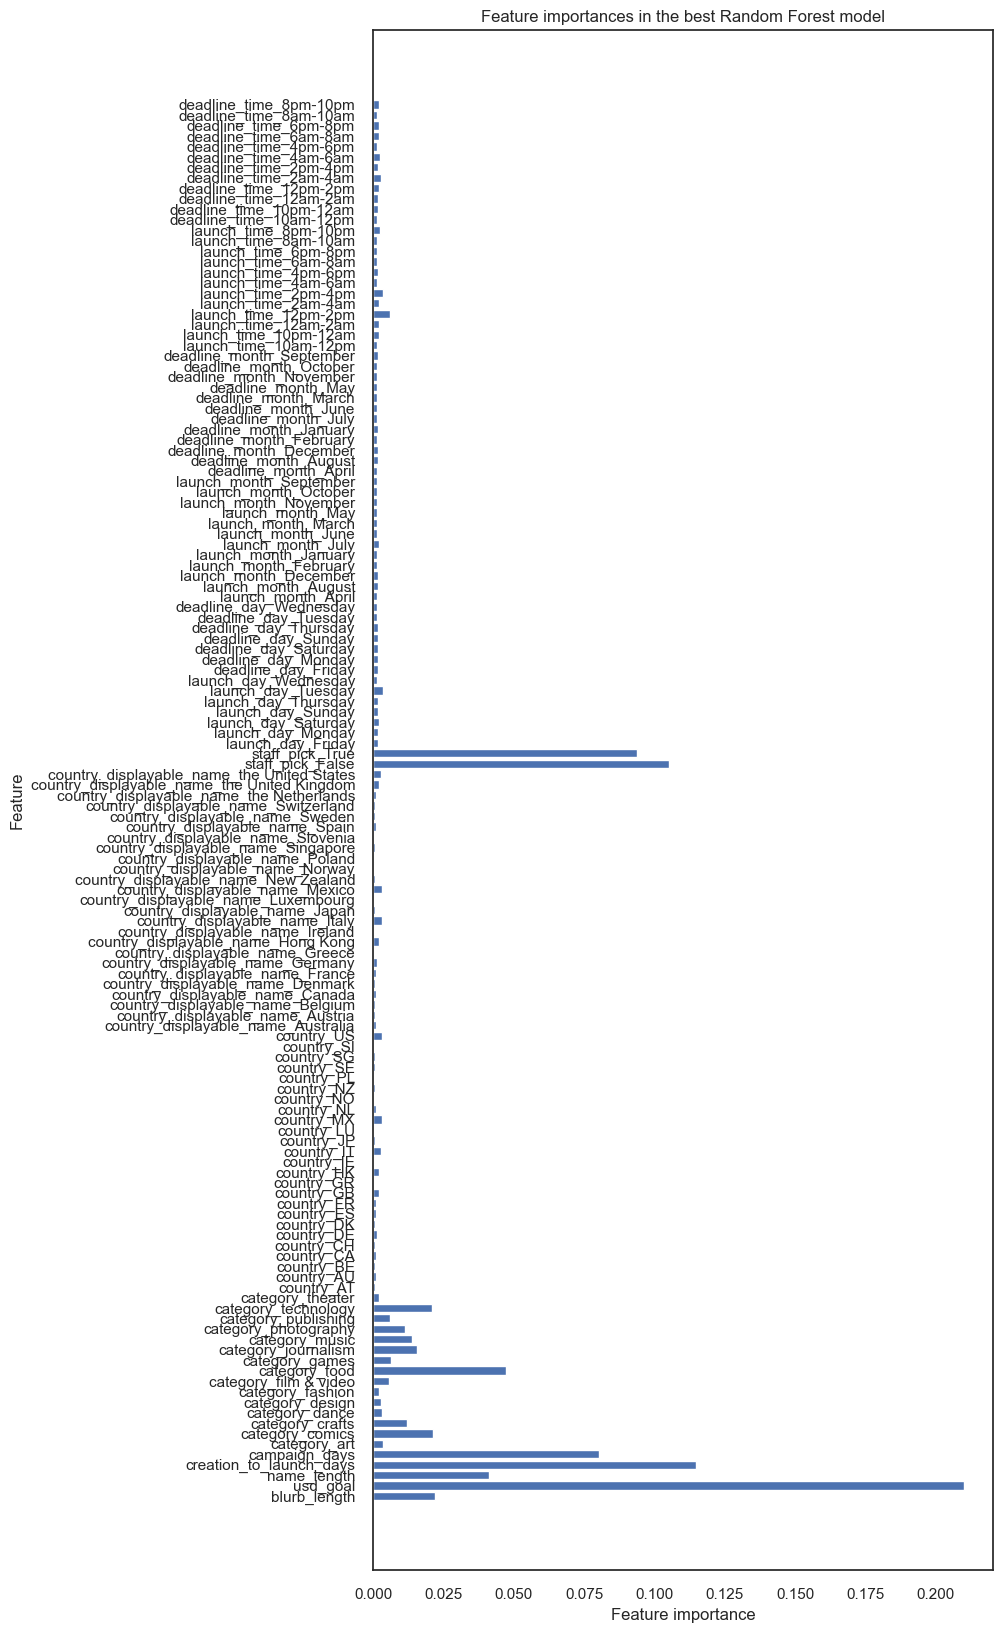

In [172]:
# Plotting feature importance
n_features = X_train.shape[1]
plt.figure(figsize=(8,20))
plt.barh(range(n_features), best_rf.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.title("Feature importances in the best Random Forest model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### Model 7: XGBoost without PCA
An XGBoost model will now be fitted using the log-transformed data, but without using PCA. This is to attempt to improve upon the Random Forest model, and to see whether the feature importances are similar.

In [173]:
# Using GridSearchCV to test multiple different parameters
xgb_start2 = time.time()

xgb2 = xgb.XGBClassifier(learning_rate=0.1, max_depth=35, verbose=2)

params_xgb2 = [ 
  {'n_estimators': [100, 200],
   'subsample': [0.7, 0.9],
   'min_child_weight': [100, 200]
  }
]

grid_xgb2 = GridSearchCV(estimator=xgb2, param_grid=params_xgb2, cv=5)

grid_xgb2.fit(X_train, y_train)

xgb_end2 = time.time()

xgb_best_score2 = grid_xgb2.best_score_
xgb_best_params2 = grid_xgb2.best_params_

print(f"Time taken to run: {round((xgb_end2 - xgb_start2)/60,1)} minutes")
print("Best accuracy:", round(xgb_best_score2,2))
print("Best parameters:", xgb_best_params2)

[00:04:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[00:05:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[00:06:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[00:07:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[00:07:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[00:08:34] WARN

Results:

- Time taken to run: 251.7 minutes
- Best accuracy: 0.75
- Best parameters: {'min_child_weight': 100, 'n_estimators': 100, 'subsample': 0.7}

XGBoost score for training set: 0.78184
XGBoost score for test set: 0.76272

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.68     23228
           1       0.77      0.85      0.81     34232

    accuracy                           0.76     57460
   macro avg       0.76      0.74      0.75     57460
weighted avg       0.76      0.76      0.76     57460



C:\Users\Abdel Abdalla\AppData\Local\Temp\ipykernel_21412\3487861526.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


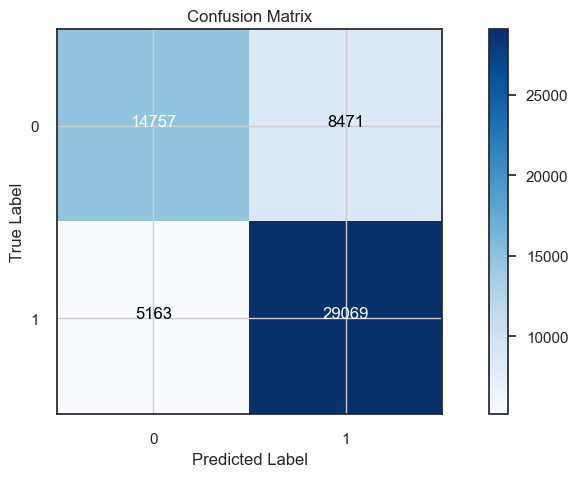

In [174]:
best_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=35, min_child_weight=100, n_estimators=100, subsample=0.7)

best_xgb.fit(X_train, y_train)

xgb_y_hat_train2 = best_xgb.predict(X_train)
xgb_y_hat_test2 = best_xgb.predict(X_test)

print("XGBoost score for training set:", round(best_xgb.score(X_train, y_train),5))
print("XGBoost score for test set:", round(best_xgb.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, xgb_y_hat_test2))
plot_cf(y_test, xgb_y_hat_test2)

By log-transforming features it was possible to improve the weighted average F1 score to 0.75, which makes it the highest performing model so far. Overfitting does not appear to be an issue.

The graph below shows the feature importances for the model.

- Goal size is the most important feature, followed by the number of days taken from project creation to launch, followed by the name and blurb lengths.
- Campaign length was also fairly important.
- Most other categories were relatively unimportant, although project categories and whether the project was from the US are slightly important.

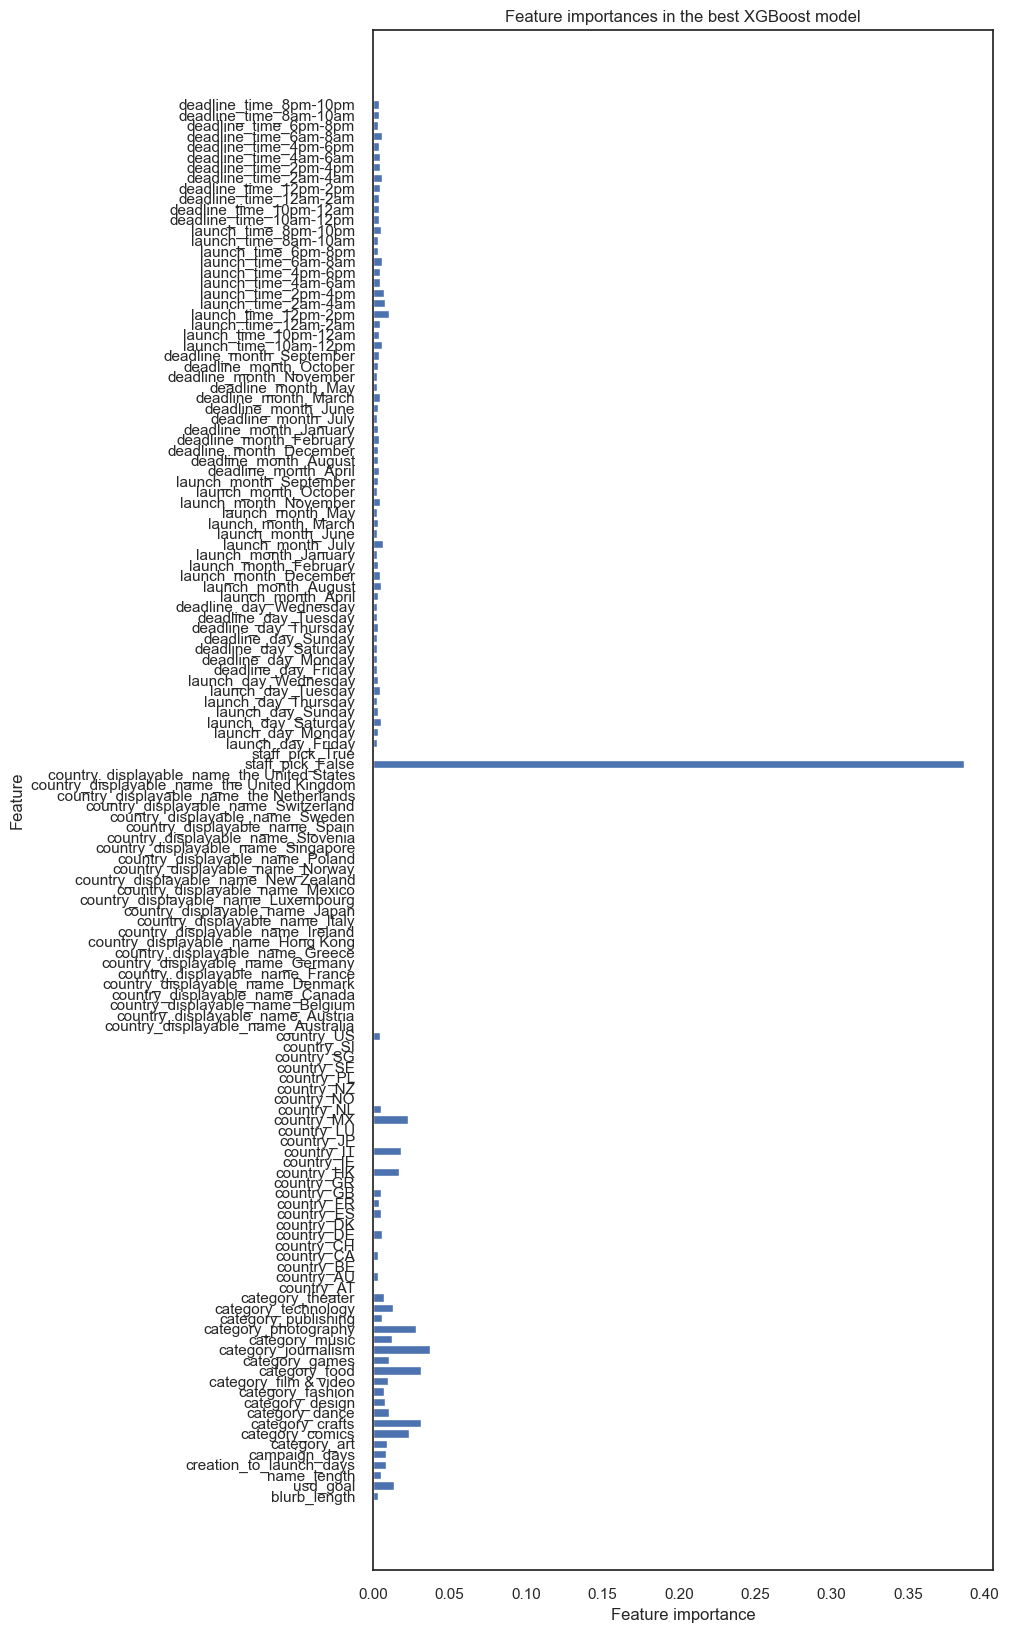

In [175]:
# Plotting feature importance
n_features = X_train.shape[1]
plt.figure(figsize=(8,20))
plt.barh(range(n_features), best_xgb.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.title("Feature importances in the best XGBoost model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

Plotting the feature importances for the Random Forest model and the XGBoost model side-by-side shows the differences between them (see graph below).

- Goal size followed by the number of days from creation to launch are the two most important features in each model.
- The main difference is in the importance of whether or not a project was a staff pick - this was very important in the Random Forest model, and not important at all in the XGBoost model.
- There are some other differences, including category being more important in Random Forests, and name and blurb length being more important in XGBoost.
- Overall, the Random Forest model seems to consider more features more important, whereas XGBoost depends more heavily on only five features.

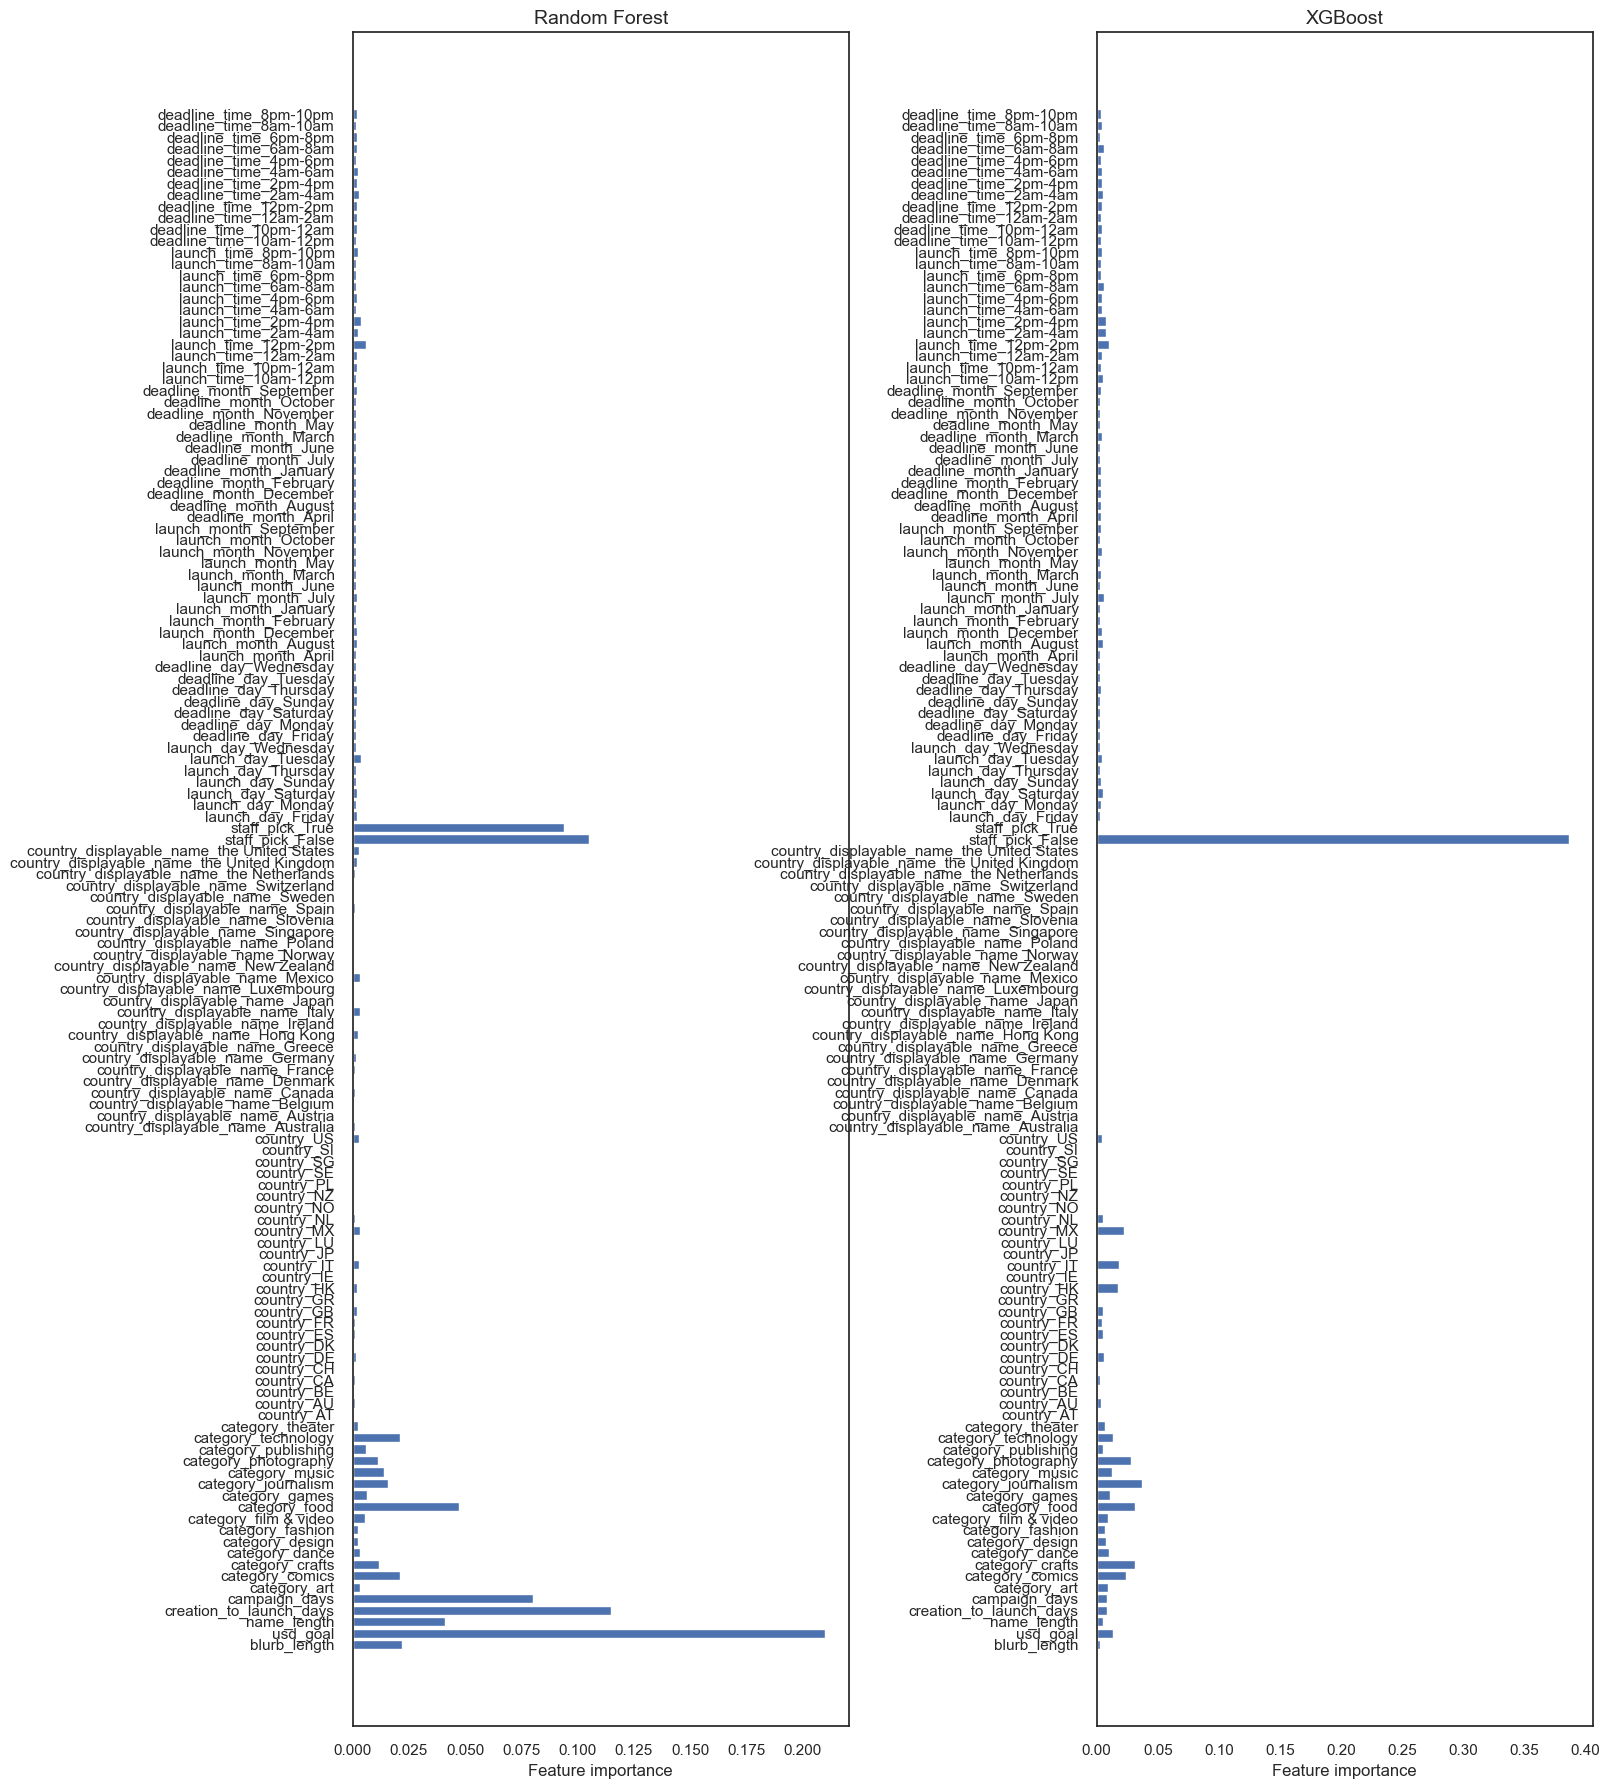

In [176]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,22))
n_features = X_train.shape[1]
ax1.barh(range(n_features), best_rf.feature_importances_, align='center')
ax1.set_yticks(np.arange(n_features))
ax1.set_yticklabels(X_train.columns.values) 
ax1.set_xlabel('Feature importance')
ax1.set_title('Random Forest', fontsize=14)
ax2.barh(range(n_features), best_xgb.feature_importances_, align='center') 
ax2.set_yticks(np.arange(n_features))
ax2.set_yticklabels(X_train.columns.values)
ax2.set_xlabel('Feature importance')
ax2.set_title('XGBoost', fontsize=14)
fig.subplots_adjust(wspace=0.5);

### Additional investigation of PCA
The graphs of feature importances above indicate that launch and deadline months, days and times are not very important to either model. Filtering out unimportant feature prior to PCA might help create a more effective PCA.

In [177]:
# Dropping columns beginning with 'deadline'
X_filtered = X_log[[c for c in X_log.columns if c[:8] != 'deadline']]

# Dropping columns beginning with 'launch'
X_filtered = X_filtered[[c for c in X_filtered.columns if c[:6] != 'launch']]

X_filtered.head()

,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,country_AT,country_AU,country_BE,country_CA,country_CH,...,country_displayable_name_Belgium,country_displayable_name_Canada,country_displayable_name_Denmark,country_displayable_name_France,country_displayable_name_Germany,country_displayable_name_Greece,country_displayable_name_Hong Kong,country_displayable_name_Ireland,country_displayable_name_Italy,country_displayable_name_Japan,country_displayable_name_Luxembourg,country_displayable_name_Mexico,country_displayable_name_New Zealand,country_displayable_name_Norway,country_displayable_name_Poland,country_displayable_name_Singapore,country_displayable_name_Slovenia,country_displayable_name_Spain,country_displayable_name_Sweden,country_displayable_name_Switzerland,country_displayable_name_the Netherlands,country_displayable_name_the United Kingdom,country_displayable_name_the United States,staff_pick_False,staff_pick_True
0,-0.322161,-2.171975,-0.859153,-0.279772,-1.144435,-0.345858,-0.202854,-0.190288,-0.128536,5.057998,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.056058,-0.222386,-0.067978,-0.127356,-0.141756,-0.022277,-0.094154,-0.056617,-0.119238,-0.065411,-0.018283,-0.128955,-0.065732,-0.048039,-0.031262,-0.066251,-0.013519,-0.112052,-0.08667,-0.060998,-0.094351,-0.358214,0.69024,-2.444274,2.444274
1,-0.855346,0.099612,-1.561905,1.086264,-0.251797,2.891361,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.056058,-0.222386,-0.067978,-0.127356,-0.141756,-0.022277,-0.094154,-0.056617,-0.119238,-0.065411,-0.018283,-0.128955,-0.065732,-0.048039,-0.031262,-0.066251,-0.013519,-0.112052,-0.08667,-0.060998,-0.094351,-0.358214,0.69024,0.409119,-0.409119
2,-0.677617,0.099612,0.342210,-2.630818,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.056058,-0.222386,-0.067978,-0.127356,-0.141756,-0.022277,-0.094154,-0.056617,-0.119238,-0.065411,-0.018283,-0.128955,-0.065732,-0.048039,-0.031262,-0.066251,-0.013519,-0.112052,-0.08667,-0.060998,-0.094351,-0.358214,0.69024,0.409119,-0.409119
3,1.455122,0.099612,-1.561905,1.280014,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.056058,-0.222386,-0.067978,-0.127356,-0.141756,-0.022277,-0.094154,-0.056617,-0.119238,-0.065411,-0.018283,-0.128955,-0.065732,-0.048039,-0.031262,-0.066251,-0.013519,-0.112052,-0.08667,-0.060998,-0.094351,-0.358214,0.69024,0.409119,-0.409119
4,1.099665,-1.237426,0.840820,-2.630818,-2.118222,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,2.501557,-0.190023,-0.338939,-0.340307,-0.171121,-0.052176,-0.156028,-0.056058,-0.222386,-0.060998,...,-0.056058,-0.222386,-0.067978,-0.127356,-0.141756,-0.022277,-0.094154,-0.056617,-0.119238,-0.065411,-0.018283,-0.128955,-0.065732,-0.048039,-0.031262,-0.066251,-0.013519,-0.112052,-0.08667,-0.060998,-0.094351,-0.358214,0.69024,0.409119,-0.409119


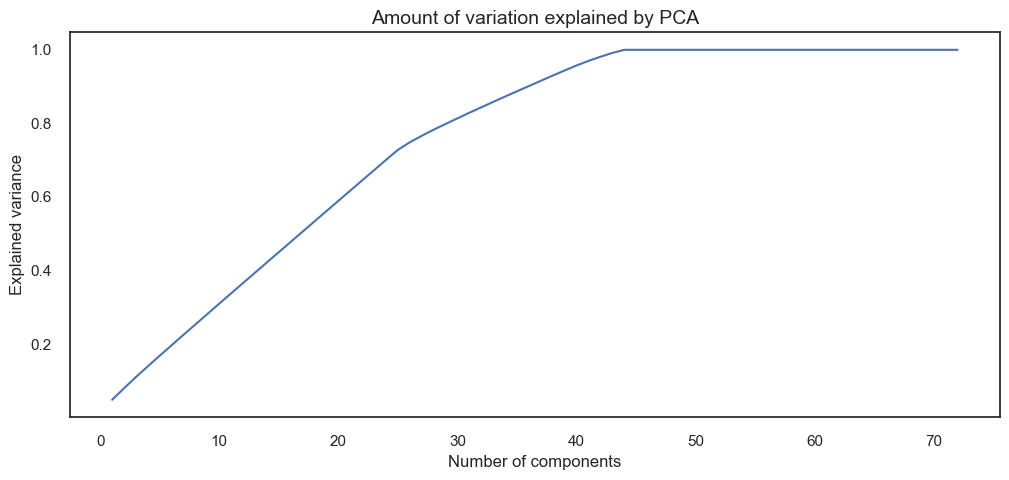

In [188]:
# Conducting PCA
pca = PCA()
principal_comps = pca.fit_transform(X_filtered)
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plotting the amount of variation explained by PCA with different numbers of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

Unfortunately, this appears to show the same pattern as the previous PCA analysis, with no clear 'elbow' point and without the first few components explaining the majority of variation.

In [197]:
# Creating a list of PCA column names
pca_columns = []
for i in range(1,45):
    pca_columns.append("PC"+str(i))

# Creating a dataframe of principal components
principal_comps_df = pd.DataFrame(principal_comps, columns=pca_columns)

ValueError: Shape of passed values is (191533, 22), indices imply (191533, 44)

In [186]:
# Adding target (success/fail) to the principal components dataframe
principal_comps_df = pd.concat([principal_comps_df, y_log.reset_index()], axis=1)
principal_comps_df.drop('id', inplace=True, axis=1)
principal_comps_df.head()

NameError: name 'principal_comps_df' is not defined

In [187]:
# Plotting the first two principal components, coloured by target
plt.figure(figsize=(8,6))
sns.scatterplot(x=principal_comps_df.PC1, y=principal_comps_df.PC2, data=principal_comps_df, hue='state')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

NameError: name 'principal_comps_df' is not defined

<Figure size 800x600 with 0 Axes>

The graph above reiterates the point that even the first two components do not explain much variation alone. There is also an interesting pattern in the data, although the reason is unclear.

As a final experiment, countries will also be dropped from the dataframe, as they also do not explain much variance.

In [189]:
# Dropping columns beginning with 'country'
X_filtered = X_filtered[[c for c in X_filtered.columns if c[:7] != 'country']]

X_filtered.head()

,blurb_length,usd_goal,name_length,creation_to_launch_days,campaign_days,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater,staff_pick_False,staff_pick_True
0,-0.322161,-2.171975,-0.859153,-0.279772,-1.144435,-0.345858,-0.202854,-0.190288,-0.128536,5.057998,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,-2.444274,2.444274
1,-0.855346,0.099612,-1.561905,1.086264,-0.251797,2.891361,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,0.409119,-0.409119
2,-0.677617,0.099612,0.342210,-2.630818,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,0.409119,-0.409119
3,1.455122,0.099612,-1.561905,1.280014,-0.251797,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,3.376770,-0.25617,-0.150895,-0.399751,-0.190023,-0.338939,-0.340307,-0.171121,0.409119,-0.409119
4,1.099665,-1.237426,0.840820,-2.630818,-2.118222,-0.345858,-0.202854,-0.190288,-0.128536,-0.197707,-0.240177,-0.399944,-0.296141,-0.25617,-0.150895,2.501557,-0.190023,-0.338939,-0.340307,-0.171121,0.409119,-0.409119


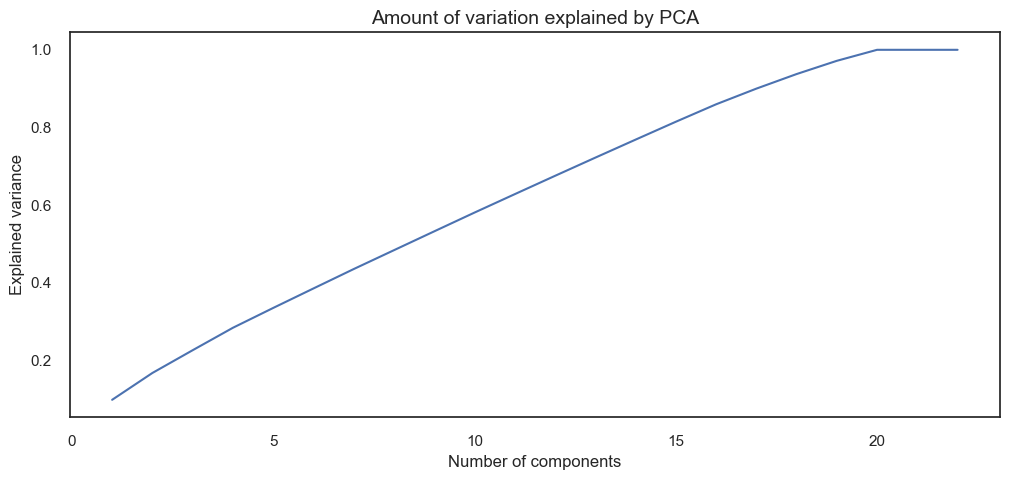

In [190]:
# Conducting PCA
pca = PCA()
principal_comps = pca.fit_transform(X_filtered)
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plotting the amount of variation explained by PCA with different numbers of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

Unfortunately this shows a similar pattern.

#### Potential directions for future work
Potential additional improvements to the models include:

Further explanation of PCA, or possibly using the original PCA but with 58 components instead, as this only had slightly lower accuracy scores in the logistic regression test case than using 90 components
Further tuning of Random Forest and XGBoost parameters

## Conclusions and recommendations
Choosing a final model

In [191]:
# Extracting weighted average precision, recall and test scores for each best model
# Logistic regression
lr_test_precision, lr_test_recall, lr_test_f1score, lr_test_support = precision_recall_fscore_support(y_test, lr_y_hat_test2, average='weighted')
lr_train_precision, lr_train_recall, lr_train_f1score, lr_train_support = precision_recall_fscore_support(y_train, lr_y_hat_train2, average='weighted')
# Random Forest
rf_test_precision, rf_test_recall, rf_test_f1score, rf_test_support = precision_recall_fscore_support(y_test, rf_y_hat_test2, average='weighted')
rf_train_precision, rf_train_recall, rf_train_f1score, rf_train_support = precision_recall_fscore_support(y_train, rf_y_hat_train2, average='weighted')
# XGBoost
xgb_test_precision, xgb_test_recall, xgb_test_f1score, xgb_test_support = precision_recall_fscore_support(y_test, xgb_y_hat_test2, average='weighted')
xgb_train_precision, xgb_train_recall, xgb_train_f1score, xgb_train_support = precision_recall_fscore_support(y_train, xgb_y_hat_train2, average='weighted')

In [192]:
# Logistic regression results
lr_results = {'Precision':[lr_train_precision, lr_test_precision], 'Recall':[lr_train_recall, lr_test_recall], 'F1_score': [lr_train_f1score, lr_test_f1score]}
lr_results = pd.DataFrame(lr_results, index=['Train', 'Test'])
print("Best logistic regression results (Model 5):")
lr_results
    

Best logistic regression results (Model 5):


,Precision,Recall,F1_score
Train,0.748327,0.750912,0.747614
Test,0.745472,0.748033,0.744692


In [193]:
# Random Forest results
rf_results = {'Precision':[rf_train_precision, rf_test_precision], 'Recall':[rf_train_recall, rf_test_recall], 'F1_score': [rf_train_f1score, rf_test_f1score]}
rf_results = pd.DataFrame(rf_results, index=['Train', 'Test'])
print("Best Random Forest results (Model 6):")
rf_results

Best Random Forest results (Model 6):


,Precision,Recall,F1_score
Train,0.787333,0.787683,0.783583
Test,0.757544,0.759085,0.754334


In [194]:
# XGBoost results
xgb_results = {'Precision':[xgb_train_precision, xgb_test_precision], 'Recall':[xgb_train_recall, xgb_test_recall], 'F1_score': [xgb_train_f1score, xgb_test_f1score]}
xgb_results = pd.DataFrame(xgb_results, index=['Train', 'Test'])
print("Best XGBoost results (Model 7):")
xgb_results

Best XGBoost results (Model 7):


,Precision,Recall,F1_score
Train,0.780545,0.781843,0.778446
Test,0.760791,0.762722,0.759094


### Final model evaluation and interpretation
Each model was able to achieve an accuracy of 73-75% after parameter tuning. Although it was relatively easy to reach an accuracy level of about 70% for each model, parameter tuning and other adjustments were only able to increase accuracy levels by a small amount. Possibly the large amount of data for each of only two categories meant that there was enough data for even a relatively simple model (e.g. logistic regression with default settings) to achieve a good level of accuracy.

The final chosen model is the tuned XGBoost model, which had the highest test set weighted average F1 score of 0.747.

Interestingly, each model performed worse at predicting failures compared to successes, with a lower true negative rate than true positive rate (see calculations below). I.e. it classified quite a few failed projects as successes, but relatively few successful projects as failures. Possibly the factors that might cause a project to fail are more likely to be beyond the scope of the data, e.g. poor marketing, insufficient updates, or not replying to messages from potential backers.

The false positive and false negative rates mean that, if the data about a new project is fed through the model to make a prediction about its success or failure:

if the project is going to end up being a success, the model will correctly predict this as a success about 80% of the time
if the project is going to end up being a failure, the model will only correctly predict this as a failure about 65% of the time, and the rest of the time will incorrectly predict it as a success

In [196]:
r_cf = confusion_matrix(y_test, xgb_y_hat_test2)
print("Evaluation of the final model:")
print("\nIf the true value is failure, what proportion does the model correctly predict as a failure? \n(True negative rate/specificity):\n", round(r_cf[0][0]/sum(r_cf[0]),4))
print("If the true value is success, what proportion does the model correctly predict as a success? \n(True positive rate/recall/sensitivity):\n", round(r_cf[1][1]/sum(r_cf[1]),4))
print("\nIf the model predicts a failure, what proportion are actually failures? \n(Negative prediction value):\n", round(r_cf[0][0]/sum(r_cf[:,0]),4))
print("If the model predicts a success, what proportion are actually successes? \n(Positive prediction value/precision):\n", round(r_cf[1][1]/sum(r_cf[:,1]),4))


Evaluation of the final model:

If the true value is failure, what proportion does the model correctly predict as a failure? 
(True negative rate/specificity):
 0.6353
If the true value is success, what proportion does the model correctly predict as a success? 
(True positive rate/recall/sensitivity):
 0.8492

If the model predicts a failure, what proportion are actually failures? 
(Negative prediction value):
 0.7408
If the model predicts a success, what proportion are actually successes? 
(Positive prediction value/precision):
 0.7743


## Recommendations
Some of the factors that had a positive effect on success rate and/or the amount of money received (as deduced from a mixture of data exploration and model feature importances) are:

Most important:

Smaller project goals
Being chosen as a staff pick (a measure of quality)
Shorter campaigns
Taking longer between creation and launch
Comics, dance and games projects
Less important:

Projects from Hong Kong
Film & video and music projects are popular categories on the site, and are fairly successful
Launching on a Tuesday (although this is also the most common day to launch a project, so beware the competition)
Launching in October
Launching between 12pm and 2pm UTC (this is related to the country a project is launched from, but backers could come from all over the world)
Name and blurb lengths (shorter blurbs and longer names are preferred)
Factors which had a negative effect on success rate and/or the amount of money received are:

Most important:

Large goals
Longer campaigns
Food and journalism projects
Projects from Italy
Less important:

Launching on a weekend
Launching in July or December
Launching between 6pm and 4am UTC
Overall, Kickstarter is well suited to small, high-quality projects, particularly comics, dances and games. It is less suited to larger projects, particularly food and journalism projects.